<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/blob/master/04_PREPARACION_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

In [ ]:
Image("local/imgs/udea-datascience.png")

# **Preparación de los datos**
## Desarrollado por: Ph.D. Javier Fernando Botía Valderrama
## Universidad de Antioquia

In [ ]:
!pip install scikit-learn --upgrade # Antes de empezar, se recomienda actualizar scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


# ¿Qué son los datos?

**Datos**: Son observaciones de fenómenos del mundo real o de sucesos. Cada parte de los datos representa un aspecto limitado de la realidad pero una colección de ellos muestra una "imagen o representación" global de varios acontencimientos del mundo real. 

**Definición formal de los datos:** Dado un conjunto de datos, $X$, decimos que $x_{n,d}$ es un elemento de $X$ tal que $n$ es una observación o *muestra* y $d$ es un descriptor o *característica*, donde $X$ es una matriz representado como:

$$X = \begin{bmatrix} x_{1,1} & \cdots& x_{1,d} & \cdots&  x_{1,D} \\
\vdots & \cdots& \ddots & \cdots&  \vdots \\
x_{n,1} & \cdots& x_{n,d} & \cdots&  x_{n,D} \\
\vdots & \cdots& \ddots & \cdots&  \vdots \\
x_{N,1} & \cdots& x_{N,d} & \cdots&  x_{N,D} \\
\end{bmatrix}_{N x D} $$

siendo $N$ el número de muestras u observaciones y $D$ el número de características, donde $X \in \mathbb{R}$.

**Característica o Descriptor:** Es una representación numérica de un conjunto de datos qe puede representar una cantidad de acontecimientos, sucesos o hechos del mundo real. Por lo general, las características se difieren desde el tipo de dato (que se explicará más adelante) que este disponible en el conjunto de datos. Una característica puede representar, por ejemplo, temperatura, presión, número de clientes por día, fechas, etc.

**El problema de la cantidad de características de los datos:** Si no hay suficientes características relevantes, entonces el modelo que se crea en aprendizaje automático no estará disponible para generar una tarea. Por el contrario, si hay demasiadas características o que muchas características no son relevantes, entonces el modelo de aprendizaje automático tendrá un costo computacional alto (es diferente al costo de máquina del computador) y generará un resultado ineficiente a la salida del modelo.

**Espacio de características:** Representa un conjunto de datos al considerar que cada *eje de las características o desciptores* es un eje de un sistema de coordenadas.

**La maldición de la dimensionalidad:** Es un fenómeno donde el espacio de características se vuelve más limitado cuando hay un número mayor de dimensiones de los datos. Lo anterior genera modelos con sobreajustes que genera resultados insactifactorios para una toma de decisiones a partir de los datos.

In [ ]:
import pandas as pd

nombres = ['Sex', 'MaritalStatus', 'Age', 'Education', 'Occupation', 'YearsInSf', 'DualIncome', 'HouseholdMembers', 'Under18',
           'HouseholdStatus', 'TypeOfHome', 'EthnicClass', 'Language', 'Income'] # Etiquetas de cada características

datos = pd.read_table('local/data/marketing.dat', sep = ",", names = nombres) # Lee los datos con separación con coma entre datos
display(datos)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,@relation marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@attribute Sex integer[1,2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@attribute MaritalStatus integer[1,5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@attribute Age integer[1,7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@attribute Education integer[1,6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,2,5,1,1,2,5,1,3,2,3,1,7,1,1.0
9007,1,5,2,4,1,5,1,4,0,3,1,7,1,2.0
9008,2,5,1,2,1,5,1,3,2,3,1,7,1,1.0
9009,1,1,6,4,3,5,2,3,1,2,3,7,1,4.0


In [ ]:
datos_nuevos = datos.drop(datos.index[:18]) # Elimina las filas que no contiene información o que contiene NaN
datos_nuevos # muestra una parte de los datos

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
18,2,1,5,4,5,5,3,3,0,1,1,7,?,9.0
19,1,1,5,5,5,5,3,5,2,1,1,7,1,9.0
20,2,1,3,5,1,5,2,3,1,2,3,7,1,9.0
21,2,5,1,2,6,5,1,4,2,3,1,7,1,1.0
22,2,5,1,2,6,3,1,4,2,3,1,7,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,2,5,1,1,2,5,1,3,2,3,1,7,1,1.0
9007,1,5,2,4,1,5,1,4,0,3,1,7,1,2.0
9008,2,5,1,2,1,5,1,3,2,3,1,7,1,1.0
9009,1,1,6,4,3,5,2,3,1,2,3,7,1,4.0


In [ ]:
DATA = datos_nuevos.values # Extraemos los valores del DataFrame
print("Número de muestras u observaciones: ", DATA.shape[0])
print("Número de características o descriptores: ", DATA.shape[1])

Número de muestras u observaciones:  8993
Número de características o descriptores:  14


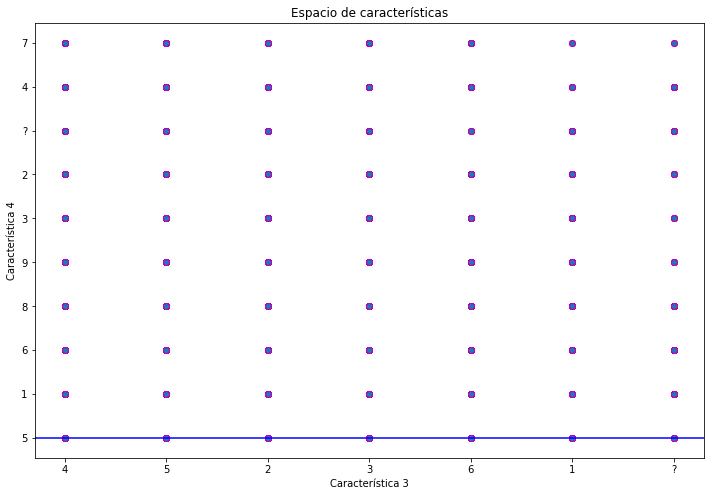

In [ ]:
from matplotlib import pyplot # Librería para hacer gráficas

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(DATA[:,3], DATA[:,4], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Espacio de características') # Titulo de la gráfica
pyplot.xlabel('Característica 3') # Etiqueta del eje x
pyplot.ylabel('Característica 4') # Etiqueta del eje y
pyplot.show() # Mostrar figura

# Tipos de datos


Los datos pueden ser de diferentes fuentes: **categóricas, cuantitativas, cualitativas, mixtas, imágenes, texto, etc.**. Para esta sección, se mostrará las dos primeras.

**1) Datos Categóricos:** Son datos que representa categorías o etiquetas, por ejemplo, las ciudades más grandes de un país, las cuatro temporadas del año, los equipos de fútbol en España, etc. Por lo general, los datos categóricos son *finitos* y los valores categóricos se pueden representar numéricamente. No obstante, se puede presentar dos escenarios: 

*Características Ordinales:* Son valores categóricos que pueden ser clasificados de forma ordenada, por ejemplo, que $0 \leq 1 \leq 10$.

*Características Nominales:* Son valores categóricos que no tienen ningún orden. Por ejemplo, Real Madrid es más grande o más pequeño que Barcelona ¿Cómo saber que es más grande y más pequeño?

Considerando ambos escenarios, dentro de los datos categóricos, existen varios métodos para codificar las variables categóricas que analizaremos a continuación:



a) **Codificación de un solo paso (One-Hot Encoding):** Es un método que codifica en un grupo de bits los valores categóricos. Cada bit representa una posible categórica y por regla general, la variable categórica no puede pertenecer a múltiples categorías de una sola vez, por lo que solamente 1 bit en el grupo puede estar activo. Un ejemplo sencillo es el siguiente:

Equipo de futbol $\,\,\,\,\,$ e1 $\,\,\,\,\,$ e2 $\,\,\,\,\,$ e3 $\,\,\,\,\,$ e4

Real Madrid$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 0

Barcelona$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 0

Sevilla $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,$ 0

Alaves $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,$ 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

nombres = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital,status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv('local/data/adult.data', header = None, index_col= False, names = nombres)
display(data.head()) 

,age,workclass,fnlwgt,education,education-num,"marital,status",occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info() # Información completa de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital,status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data = data[['age','workclass','education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
ENC = OneHotEncoder(handle_unknown='ignore') # One-Hot Encoding. El parámetro handle_unknown define si una característica categórica está presente durante la transformación
                                             # Si se utiliza la opción 'ignore' significa que si hay una categoría desconocida y es encontrado durante la transformación,
                                             # el resultado de las columnas codificadas serán 0. Si se utiliza 'error', entonces se codificara las categorías desconocidas como None.
ENC.fit(data) 

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [ ]:
ENC.categories_ # Determina las categorias cada característica determinadas durante la trasnformación.

[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 90]),
 array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Female', ' Male'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,

In [ ]:
DATA_EN = ENC.transform(data).toarray() # Codificación
display(DATA_EN)
print('Número de características codificadas: ', DATA_EN.shape[1])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Número de características codificadas:  211


In [ ]:
ENC.inverse_transform(DATA_EN) # Decodificación

array([[39, ' State-gov', ' Bachelors', ..., 40, ' Adm-clerical',
        ' <=50K'],
       [50, ' Self-emp-not-inc', ' Bachelors', ..., 13,
        ' Exec-managerial', ' <=50K'],
       [38, ' Private', ' HS-grad', ..., 40, ' Handlers-cleaners',
        ' <=50K'],
       ...,
       [58, ' Private', ' HS-grad', ..., 40, ' Adm-clerical', ' <=50K'],
       [22, ' Private', ' HS-grad', ..., 20, ' Adm-clerical', ' <=50K'],
       [52, ' Self-emp-inc', ' HS-grad', ..., 40, ' Exec-managerial',
        ' >50K']], dtype=object)

En la codificación de un solo paso, utiliza más de un bit para su codificación, lo cual el número de características codificadas aumenta. Por ejemplo, si hay k-1 de los bits son 0, entonces el último bit debe ser 1 debido a que la variable debe tomar un 1 en k valores. Lo anterior se debe a que la suma de todos los bits por cada muestra u observación es igual a 1:

$n=1\,\,\,\, e_1 + e_2 + e_k = 1$

$n=2\,\,\,\, e_1 + e_2 + e_k = 1$

$\vdots \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots$

$n=N\,\,\,\, e_1 + e_2 + e_k = 1$

donde cada $e_c$ es 0 o 1.

**Limitante de la codificación de una sola vez:** Genera demasiados grados de libertad o k valores que incrementa la dimensionalidad de los datos cuando las variables solo requiere k-1 valores.

**b) Codificación simulada (Dummy Coding)**: Este método se encarga de remover los grados de libertad extra genera la codificación de una sola vez o one-hot encoding, usando solamente *k-1 características*. En este caso, una característica es puesta debajo de las otras características por medio de un vector de todos 0, lo cual es la **categoría de referencia**. Lo anterior se puede representar mediante el siguiente ejemplo:

Equipo de futbol $\,\,\,\,\,$ e1 $\,\,\,\,\,$ e2 $\,\,\,\,\,$ e3

Real Madrid$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 

Barcelona$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 $\,\,\,\,\,\,\,\,\,$ 0 

Sevilla $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 1 

Alaves $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0 $\,\,\,\,\,\,\,\,\,$ 0



Este tipo de codificación es más fácil de trabajar que la codificación de una sola vez debido a que se reduce la cantidad de grados de libertad. 

In [ ]:
import pandas as pd

en_dummies = pd.get_dummies(data) # Codificación simulada
display(en_dummies)
print("Númeroi de características codificadas = ", en_dummies.shape[1])

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Female,gender_ Male,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
32557,40,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
32558,58,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32559,22,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Númeroi de características codificadas =  46


In [ ]:
en_dummies_sec = pd.get_dummies(data, drop_first = True) # Codificación simulada. El parámetro drop_first permite sacar las k-1 simulaciones 
                                                         # de los niveles categóricos, eliminando el primer nivel de codificación. 
display(en_dummies_sec)
print("Número de características codificadas = ", en_dummies_sec.shape[1])

,age,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Male,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ >50K
0,39,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,53,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,28,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
32558,58,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32559,22,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Número de características codificadas =  41


**c) Codificación de Efectos (Effect Coding):** Es un método similar a la codificaciíon simulada pero la categoría de referencia es representado por vectores de todos "-1". Este tipo de codificación es muy usual cuando se desea crear modelos de regresión lineal a partir de datos categóricos (que lo verán en detalle en la materia de aprendizaje automático 1).  

In [ ]:
import pandas as pd

ENC_EC = en_dummies_sec.copy() # Codificación de efectos utilizando la codificación simulada con drop_first = True
ENC_EC = ENC_EC.replace(0, -1.0) # Reemplazar 0 por -1
display(ENC_EC)

,age,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Male,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ >50K
0,39,40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,50,13,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,38,40,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,53,40,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,28,40,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
32557,40,40,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
32558,58,40,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
32559,22,20,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


**d) Codificación de etiquetas (LabelEncoder):** Es un método de codificación donde realiza una etiquetación de los valores categóricos de cada características desde 0 hasta $N_{clases}-1$. Por ejemplo, si en una característica hay un vector de valores categóricos donde solo representa "Real Madrid", "Barcelona" y "Sevilla", entonces "Real Madrid" es etiquetado como 0 y "Barcelona" es etiquetado como 1 y "Sevilla" es etiquetado como 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas

LE = LabelEncoder()
DATA_LE = LE.fit_transform(data['workclass']) # Etiquetado para una sola característica de la base de datos
display(DATA_LE)

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
LE.inverse_transform(DATA_LE) # Transformación inversa de las etiquetas transformadas con LabelEncoder

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

**e) Codificación binarizador (LabelBinarizer):** Es un método de codificación llamada también *one-vs-all (OvA)*, en cual amplia un clasificador binario a problemas de múltiples etiquetas.

In [ ]:
# Usando la información de la codificación one-hot encoding del ejemplo anterior

ENC.categories_ # Determina las categorias cada característica determinadas durante la trasnformación.

[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 90]),
 array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Female', ' Male'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,

Observen que el segundo arreglo tiene categorías array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']), que corresponde a las categorías dadas por la característica 'workclass'. Por consiguiente, se cuentan en total 9 categorias para esa características, en el cual, al trasnformarlo en codificación binarizador, se obtendrán 9 características codificadas de forma binaria. Lo anterior, se observará en la segunda parte del código:

In [ ]:
from sklearn.preprocessing import LabelBinarizer # Codificación binarizador

LB = LabelBinarizer()
DATA_LB = LB.fit_transform(data['workclass'])
display(DATA_LB)
print("Número de características codificadas de forma binaria: ",DATA_LB.shape[1])

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Número de características codificadas de forma binaria:  9


**Ventajas de la codificación de las valores categóricos:** Por lo general, la codificación de una sola vez o one-hot encoding genera redudancia de los datos que es útil para validar modelos de machine learning de un mismo problema que se esta resolviendo con la base de datos. Por otra parte, la codificación simulada o dummy coding no genera redudancia de los datos y mejora la interpretabilidad de los modelos de machine learning. En el caso de la codificación de efectos o effect coding, tampoco genera redundancia de los datos con el simple hecho que se utiliza -1.0 para la categoría de referencia.

**Desventajas de la codificación de los valores categóricos:** Para el caso de one-hot encoding, la redundancia de los datos genera problemas de interpretabilidad de los modelos cuando el tamñana original de los datos tiene una alta dimensionalidad, lo cual hace díficil su aplicabilidad en esos escenarios. Por otra parte, dummy coding no es fácil de utilizar cuando existe un gran número de datos faltantes porque los asume como categorías de referencia, generando redundancia de vectores de 0. En cambio, effect coding evita el problema de dummy coding con los datos faltantes a relacionarlos como vectores de -1.0, pero almacenar estas cantidades de -1.0 genera un alto costo de máquina y almacenamiento computacional.

**2) Datos Cuantitativos:** Son datos que expresan cantidades numéricas expresados como números naturales, enteros, racionales o reales. Por lo general, los datos cuantitativos expresan valores tomados de un conjunto de sensores, de recopilación de estadísticas, etc. Para trabajar datos cuantitativos, es necesario conocer varias técnicas que analizaremos en la siguiente sección:

# Imputación de datos

La imputación de datos es un conjunto de métodos para evitar la eliminación de muestras u observaciones útiles y valiosos para analizar datos cuando hay presencia de **datos faltantes o datos nulos**. Por lo general, la imputación de datos utiliza técnicas de interpolación para estimar valores en los datos faltantes. Existen varias estrategías para imputar datos basados en *estadísticos o en algoritmos de vecinos más cercanos*. A continuación, vamos a revisar algunos de ellos:

**a) Imputación por la media:** Es un método que sustituye los valores faltantes por el valor promedio de cada característica de los datos. A continuación, se muestra un ejemplo práctico:

In [ ]:
import pandas as pd

Nombres = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH','RH']

Datos_Aire = pd.read_excel('local/data/AirQualityUCI.xlsx', header = None, index_col= False, names = Nombres)
display(Datos_Aire)
Datos_Aire.info()  

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  AH             8991 non-null   float64
 12  RH             8991 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer # Método de imputación 

imp = SimpleImputer(missing_values = np.nan, strategy= 'mean') # Rellena los datos NaN por medio del cálculo de la media
imp.fit(Datos_Aire)
Datos_Media = imp.transform(Datos_Aire)
print(Datos_Media)

[[2.60000000e+00 1.36000000e+03 1.50000000e+02 ... 1.35999999e+01
  4.88750010e+01 7.57753825e-01]
 [2.00000000e+00 1.29225000e+03 1.12000000e+02 ... 1.33000000e+01
  4.76999998e+01 7.25487449e-01]
 [2.20000000e+00 1.40200000e+03 8.80000000e+01 ... 1.19000001e+01
  5.39750004e+01 7.50239067e-01]
 ...
 [2.40000000e+00 1.14200000e+03 2.18811816e+02 ... 2.68999996e+01
  1.83499997e+01 6.40648773e-01]
 [2.10000000e+00 1.00250000e+03 2.18811816e+02 ... 2.83249998e+01
  1.35500000e+01 5.13865916e-01]
 [2.20000000e+00 1.07075000e+03 2.18811816e+02 ... 2.85000005e+01
  1.31250000e+01 5.02803706e-01]]


**b) Imputación por la mediana:** Es un método que sustituye los valores faltantes por el valor de la mediana de cada característica de los datos. A continuación, se muestra un ejemplo práctico:

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer # Método de imputación 

imp_2 = SimpleImputer(missing_values = np.nan, strategy= 'median') # Rellena los datos NaN por medio del cálculo de la mediana
imp_2.fit(Datos_Aire)
Datos_Mediana = imp_2.transform(Datos_Aire)
print(Datos_Mediana)

[[2.60000000e+00 1.36000000e+03 1.50000000e+02 ... 1.35999999e+01
  4.88750010e+01 7.57753825e-01]
 [2.00000000e+00 1.29225000e+03 1.12000000e+02 ... 1.33000000e+01
  4.76999998e+01 7.25487449e-01]
 [2.20000000e+00 1.40200000e+03 8.80000000e+01 ... 1.19000001e+01
  5.39750004e+01 7.50239067e-01]
 ...
 [2.40000000e+00 1.14200000e+03 1.50000000e+02 ... 2.68999996e+01
  1.83499997e+01 6.40648773e-01]
 [2.10000000e+00 1.00250000e+03 1.50000000e+02 ... 2.83249998e+01
  1.35500000e+01 5.13865916e-01]
 [2.20000000e+00 1.07075000e+03 1.50000000e+02 ... 2.85000005e+01
  1.31250000e+01 5.02803706e-01]]


**c) Imputación por los valores más frecuentes:** Es un método que reemplaza los valores faltantes por los valores más frecuentes de cada características de los datos. A continuación, se muestra un ejemplo práctico:

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer # Método de imputación 

imp_3 = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent') # Rellena los datos NaN por medio del cálculo de los valores más frecuentes
imp_3.fit(Datos_Aire)
Datos_Frecuentes = imp_3.transform(Datos_Aire)
print(Datos_Frecuentes)

[[2.60000000e+00 1.36000000e+03 1.50000000e+02 ... 1.35999999e+01
  4.88750010e+01 7.57753825e-01]
 [2.00000000e+00 1.29225000e+03 1.12000000e+02 ... 1.33000000e+01
  4.76999998e+01 7.25487449e-01]
 [2.20000000e+00 1.40200000e+03 8.80000000e+01 ... 1.19000001e+01
  5.39750004e+01 7.50239067e-01]
 ...
 [2.40000000e+00 1.14200000e+03 6.60000000e+01 ... 2.68999996e+01
  1.83499997e+01 6.40648773e-01]
 [2.10000000e+00 1.00250000e+03 6.60000000e+01 ... 2.83249998e+01
  1.35500000e+01 5.13865916e-01]
 [2.20000000e+00 1.07075000e+03 6.60000000e+01 ... 2.85000005e+01
  1.31250000e+01 5.02803706e-01]]


**d) Imputación por el algoritmo KNN:** Es un método de imputación basado en el algoritmo de los vecinos más cercanos o KNN. Este método rellena los valores faltantes por medio de un cálculo de la distancia euclidiana de los vecinos más cercanos y a cada característica, se imputa los valores faltantes a través de un promedio uniforme. Sin embargo, si a cada característica le falta más de un valor, los vecinos para esa muestra pueden ser diferentes dependiendo de la característica particular que se imputa. Es importante tener en cuenta que si el número de vecinos que define el usuario es menor al número de vecinos que se puede determinar en los datos, y además que no hay distancias euclidianas que se puedan calcular, la imputación se realiza por un promedio de los valores existentes (como en la imputación por la media). En caso que hay al menos un vecino con distancia calculada, se aplica un promedio ponderado o no ponderado con los vecinos restantes. 

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imp_4 = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights= "uniform")  # Imputación por el algoritmo KNN con 5 vecinos y promedio uniforme.
imp_4.fit(Datos_Aire)
Datos_KNN_1 = imp_4.transform(Datos_Aire)
print(Datos_KNN_1)

[[2.60000000e+00 1.36000000e+03 1.50000000e+02 ... 1.35999999e+01
  4.88750010e+01 7.57753825e-01]
 [2.00000000e+00 1.29225000e+03 1.12000000e+02 ... 1.33000000e+01
  4.76999998e+01 7.25487449e-01]
 [2.20000000e+00 1.40200000e+03 8.80000000e+01 ... 1.19000001e+01
  5.39750004e+01 7.50239067e-01]
 ...
 [2.40000000e+00 1.14200000e+03 3.23200000e+02 ... 2.68999996e+01
  1.83499997e+01 6.40648773e-01]
 [2.10000000e+00 1.00250000e+03 3.05200000e+02 ... 2.83249998e+01
  1.35500000e+01 5.13865916e-01]
 [2.20000000e+00 1.07075000e+03 3.34800000e+02 ... 2.85000005e+01
  1.31250000e+01 5.02803706e-01]]


In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imp_5 = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights= "distance")  # Imputación por el algoritmo KNN con 5 vecinos y promedio ponderado donde 
                                                                                   # los vecinos más cercanos de un valor tendrán una mayor influencia que los vecinos que están más lejos.
imp_5.fit(Datos_Aire)
Datos_KNN_2 = imp_5.transform(Datos_Aire)
print(Datos_KNN_2)

[[2.60000000e+00 1.36000000e+03 1.50000000e+02 ... 1.35999999e+01
  4.88750010e+01 7.57753825e-01]
 [2.00000000e+00 1.29225000e+03 1.12000000e+02 ... 1.33000000e+01
  4.76999998e+01 7.25487449e-01]
 [2.20000000e+00 1.40200000e+03 8.80000000e+01 ... 1.19000001e+01
  5.39750004e+01 7.50239067e-01]
 ...
 [2.40000000e+00 1.14200000e+03 1.14168677e+02 ... 2.68999996e+01
  1.83499997e+01 6.40648773e-01]
 [2.10000000e+00 1.00250000e+03 1.33580259e+02 ... 2.83249998e+01
  1.35500000e+01 5.13865916e-01]
 [2.20000000e+00 1.07075000e+03 1.22029950e+02 ... 2.85000005e+01
  1.31250000e+01 5.02803706e-01]]


Cuando se desea saber cuántos valores faltantes se presenta en un conjunto de datos, la imputación de datos ofrece una transformación llamada **indicador de valores por imputar**, que permite generar valores Booleanos True o False para establecer las ubicaciones de la matriz de datos donde se indican datos faltantes. Veamos un ejemplo de aplicación:

In [ ]:
import numpy as np
from sklearn.impute import MissingIndicator

indicator = MissingIndicator(missing_values=np.nan)
indicator.fit(Datos_Aire)
Datos_indicator = indicator.transform(Datos_Aire)
print(Datos_indicator)
print("\n")
print("Características con datos faltantes: ", indicator.features_)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False False False]
 [False False  True ... False False False]
 [False False  True ... False False False]]


Características con datos faltantes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
POS = np.where(Datos_indicator == True)
print('Número total de datos: ', Datos_Aire.shape[0]*Datos_Aire.shape[1])
print('Número de muestras faltantes en la base de datos:', len(POS[0]))
print('Porcentaje de datos faltantes (%): ', (len(POS[0])/(Datos_Aire.shape[0]*Datos_Aire.shape[1]))*100)

Número total de datos:  121641
Número de muestras faltantes en la base de datos: 16701
Porcentaje de datos faltantes (%):  13.729745727180804


Otra estrategía de imputación de datos es llamado la **imputación multivariable** o **imputación iterativa**, que es un desarrollo reciente en la librería scikit-learn pero esta en una fase experimental. Para mayor información del método, ir a: *Stef van Buuren, Karin Groothuis-Oudshoorn (2011). “mice: Multivariate Imputation by Chained Equations in R”. Journal of Statistical Software 45: 1-67.*

# Escalamiento de datos

Por lo general, el escalamiento de datos es un conjunto de transformaciones de los datos tal que reduce la sensibilidad de la escala de entrada de los modelos de machine learning. Inicialmente, vamos a analizar dos transformaciones matemáticas: **escalamiento estándar** y **escalamiento robusto**. Más adelante, se explicará un caso especial del escalamiento de datos llamado **normalización de datos**, donde vamos a conocer cuatro transformaciones para normalizar. Lo anterior permite establecer que la normalización es un *caso especial* del escalamiento de datos.

**1) Escalamiento estándar (o escalamiento de varianza):** Es una transformación donde los datos son restados por la media de cada característica y dividido por la varianza de cada característica.

$$\hat{x}_{n,d} = \frac{x_{n,d} - m_{d}}{\sigma_d}$$

donde:

*   $\hat{x}_{n,d}$ es una muestra escalada de una muestra $n$ con respecto a una característica $d$.
*   $x_{n,d}$ es una muestra no escalada de una muestra $n$ con respecto a una característica $d$.
*   $m_{d}$ es la media de una característica $d$.
*   $\sigma_d$ es la varianza de una característica $d$.

Si la media es 0 y la varianza es 1, los datos originales tendrán una *distribución Gaussiana*. Veamos una ejemplo aplicativo del escalamiento estándar

In [ ]:
from matplotlib import pyplot # Librería para hacer gráficas
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

SS = StandardScaler()
Datos_Escalados_1 = SS.fit_transform(Datos_Media) # Se realiza la transformación del conjunto de datos. Para este caso, utilizaremos los datos imputados por la media de los ejemplos anteriores.
print(Datos_Escalados_1)  # Resultado del escalamiento estándar

[[ 3.39856490e-01  1.22326506e+00 -1.07742676e+00 ... -5.44708964e-01
  -2.10540710e-02 -6.76519806e-01]
 [-1.16071260e-01  9.04868178e-01 -1.67241493e+00 ... -5.79359259e-01
  -9.02800995e-02 -7.58038727e-01]
 [ 3.59046568e-02  1.42064764e+00 -2.04819694e+00 ... -7.41060642e-01
   2.79416024e-01 -6.95505357e-01]
 ...
 [ 1.87880573e-01  1.98755527e-01 -8.90030578e-16 ...  9.91454298e-01
  -1.81945624e+00 -9.72378179e-01]
 [-4.00833014e-02 -4.56836585e-01 -8.90030578e-16 ...  1.15604325e+00
  -2.10225164e+00 -1.29268690e+00]
 [ 3.59046568e-02 -1.36089907e-01 -8.90030578e-16 ...  1.17625600e+00
  -2.12729082e+00 -1.32063487e+00]]


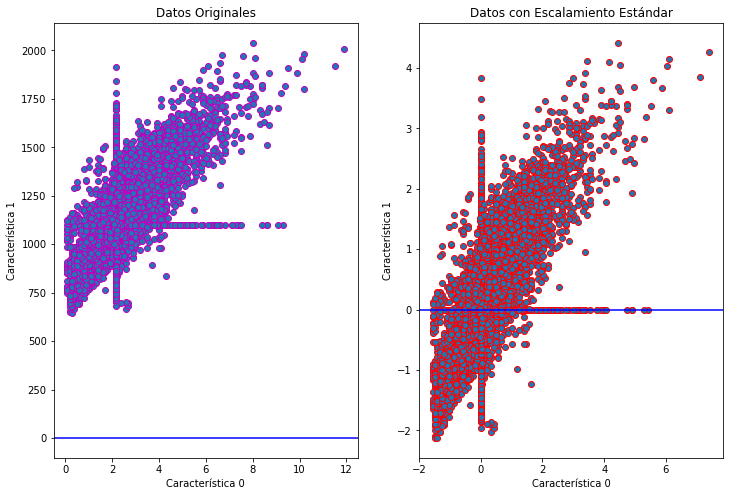

In [ ]:
fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Media[:,0], Datos_Media[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Datos_Escalados_1[:,0], Datos_Escalados_1[:,1], edgecolors="r")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Escalamiento Estándar') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

**2) Escalamiento robusto:** Es una transformación de datos cuando hay presencia de datos atípicos u outliers. Por lo general, esta transformación escala los datos en un *rango de cuartiles*, permitiendo escalar los datos independientemente para cada características al computar las estadísticas más importantes de las muestras de los datos, como la media y la desviación estándar. Esta transformación utiliza un método llamado *rango intercuartiles*, que maneja desde el primer cuartil hasta el tercer cuartil.

Veamos un ejemplo práctico de esta transformación de datos:

In [ ]:
ruido = 2.2 # Nivel de ruido
aleatorio = (np.random.randn(1000,5) * ruido) # Datos con influencia de outliers
datos_outliers = np.random.randn(1000,5) + aleatorio # datos originales + datos con influencia de outliers
print(datos_outliers)

[[ 1.55010127 -0.02548494  0.61498541  0.98544561  1.2031558 ]
 [-0.10783727  2.31280909  1.87874584  3.27165708  3.51063078]
 [ 1.76663954  0.97067754 -0.70100316  0.05610012  1.57671981]
 ...
 [-1.72532448 -2.89090445 -3.5274081   0.38931618  1.69046858]
 [ 2.07641866  0.9304805   1.85897922  1.26359282  2.99688795]
 [-3.50876608 -2.09290579 -5.28247351  0.06202011  1.11427691]]


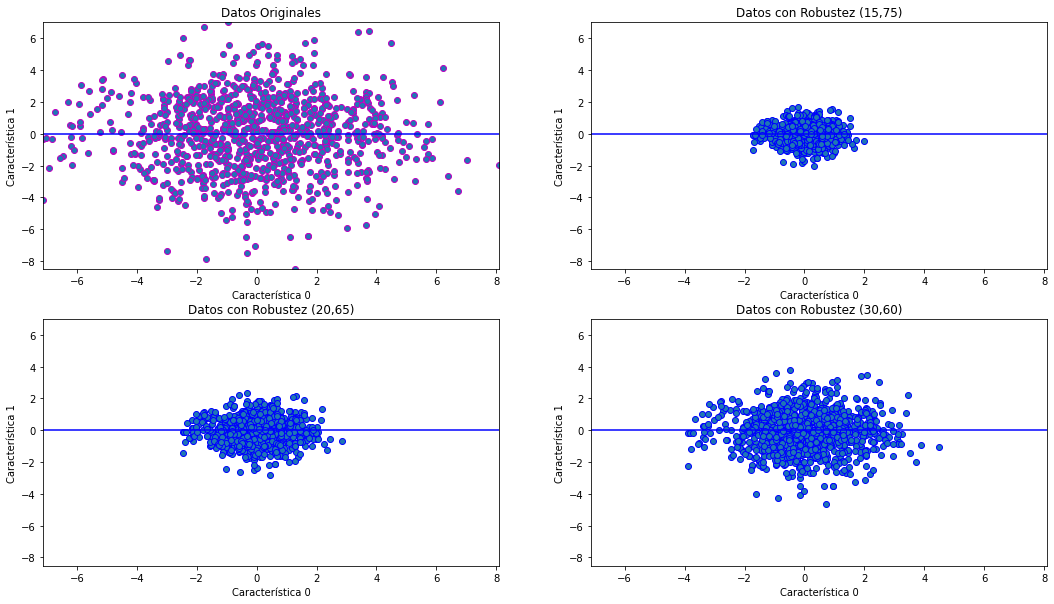

In [ ]:
from sklearn.preprocessing import RobustScaler # Escalamiento robusto
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

RS_1 = RobustScaler(quantile_range = (15, 75))
RS_2 = RobustScaler(quantile_range = (20, 65))
RS_3 = RobustScaler(quantile_range = (30, 60))

Datos_RS_1 = RS_1.fit_transform(datos_outliers)
Datos_RS_2 = RS_2.fit_transform(datos_outliers)
Datos_RS_3 = RS_3.fit_transform(datos_outliers)

fig = pyplot.figure(figsize=(18,10)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(2, 2, 1)   
ax.scatter(datos_outliers[:,0], datos_outliers[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(datos_outliers[:,0]),np.max(datos_outliers[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(datos_outliers[:,1]),np.max(datos_outliers[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(Datos_RS_1[:,0], Datos_RS_1[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(datos_outliers[:,0]),np.max(datos_outliers[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(datos_outliers[:,1]),np.max(datos_outliers[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Robustez (15,75)') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 3) 
ax.scatter(Datos_RS_2[:,0], Datos_RS_2[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(datos_outliers[:,0]),np.max(datos_outliers[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(datos_outliers[:,1]),np.max(datos_outliers[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Robustez (20,65)') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 4) 
ax.scatter(Datos_RS_3[:,0], Datos_RS_3[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(datos_outliers[:,0]),np.max(datos_outliers[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(datos_outliers[:,1]),np.max(datos_outliers[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Robustez (30,60)') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

# Caso especial del escalamiento de datos: Normalización

La **Normalización** se define como una transformación de los datos en una escala entre 0 y 1 (datos normales) o entre un rango menor, es decir, $0 < \hat{x} < 1$. Veamos algunas de estas transformaciones:

**1) Normalización Min-Max** Esta transformación llamada escalamiento min-max, normaliza los datos a una escala en el rango $\lbrack 0,1 \rbrack$, estrechando todos los datos.

*Definición formal de Min-Max:* Dado $x_{n,d}$ un dato de una muestra $n$ con respecto a una características $d$, decimos que $\hat{x}_{n,d}$ es un dato normalizado, tal que  $0 \leq \hat{x}_{n,d} \leq 1$, donde la normalización es la razón entre la resta $x_{n,d} - xmin_{d}$ y la resta entre $xmax_d - xmin_{d}$, siendo $xmin_{d}$ y $xmax_{d}$ el valor mínimo y máximo de cada característica $d$, respectivamente.

$$\hat{x}_{n,d} = \frac{x_{n,d} - xmin_{d}}{xmax_{d} - xmin_{d}}$$

Veamos un ejemplo de aplicación de esta transformación:

In [ ]:
def normalizacion_minmax(datos):
  xmax = np.amax(datos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
  xmin = np.amin(datos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
  N,D = datos.shape # Dimenisones de los datos

  data_minmax = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
  for d in np.arange(D):
    for n in np.arange(N):
      data_minmax[n][d] = (datos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
  
  return data_minmax

[[0.21186441 0.51184919 0.12098139 ... 0.33333333 0.49905721 0.28004639]
 [0.16101695 0.46319569 0.08883249 ... 0.32688172 0.48428661 0.26427867]
 [0.1779661  0.54201077 0.06852792 ... 0.29677419 0.56316782 0.27637413]
 ...
 [0.19491525 0.35529623 0.17919781 ... 0.61935483 0.11533626 0.22282027]
 [0.16949153 0.2551167  0.17919781 ... 0.64999999 0.05499685 0.16086487]
 [0.1779661  0.30412926 0.17919781 ... 0.65376345 0.0496543  0.15545906]]


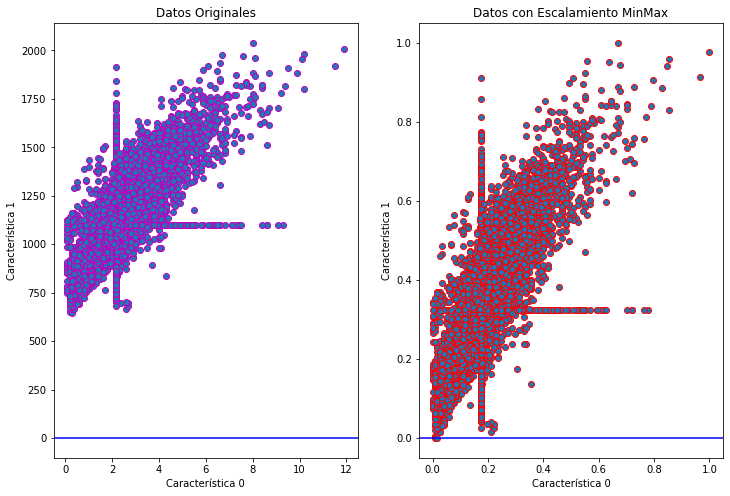

In [ ]:
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

Datos_Min_Max = normalizacion_minmax(Datos_Media) # Se realiza la transformación del conjunto de datos. Para este caso, utilizaremos los datos imputados por la media de los ejemplos anteriores.
print(Datos_Min_Max)  # Resultado del escalamiento minmax

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Media[:,0], Datos_Media[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Datos_Min_Max[:,0], Datos_Min_Max[:,1], edgecolors="r")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Escalamiento MinMax') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

[[0.21186441 0.51184919 0.12098139 ... 0.33333333 0.49905721 0.28004639]
 [0.16101695 0.46319569 0.08883249 ... 0.32688172 0.48428661 0.26427867]
 [0.1779661  0.54201077 0.06852792 ... 0.29677419 0.56316782 0.27637413]
 ...
 [0.19491525 0.35529623 0.17919781 ... 0.61935483 0.11533626 0.22282027]
 [0.16949153 0.2551167  0.17919781 ... 0.64999999 0.05499685 0.16086487]
 [0.1779661  0.30412926 0.17919781 ... 0.65376345 0.0496543  0.15545906]]


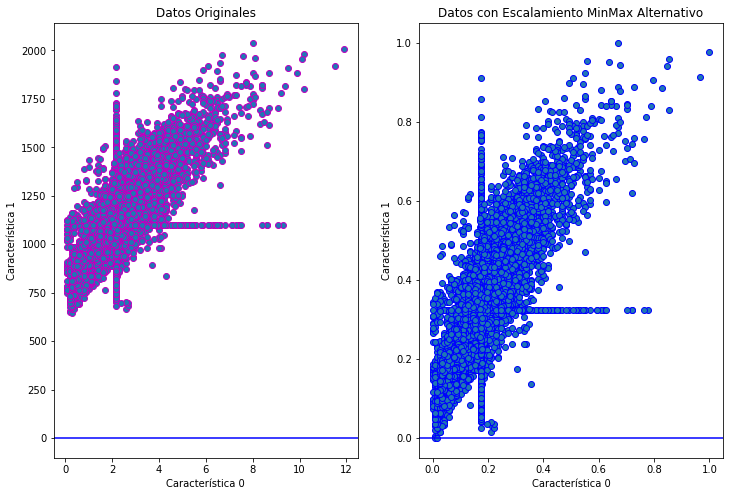

In [ ]:
# Usando una librería para el cálculo del escalamiento min-max

from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los datos cuando ajustes de valores máximos y mínimos.
from matplotlib import pyplot # Librería para hacer gráficas

MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
Datos_Min_Max_Alternativo = MinMax_1.fit_transform(Datos_Media) # Transformación de los nuevos datos con una escala MinMax

print(Datos_Min_Max_Alternativo)  # Resultado del escalamiento minmax

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Media[:,0], Datos_Media[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Datos_Min_Max_Alternativo[:,0], Datos_Min_Max_Alternativo[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Escalamiento MinMax Alternativo') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

**2) Máxima Normalización:** Es una transformación de datos que relaciona los datos $x_{n,d}$ con respecto al máximo valor de los datos por cada característica $d$, $xmax_{d}$:

$$\hat{x}_{n,d} = \frac{x_{n,d}}{xmax_{d}}$$

NOTA: Si los máximos valores de los datos originales son 1, no hay necesidad de utilizar este método de normalización.

Veamos un ejemplo de aplicación:

[[1.53664303e-03 8.03782506e-01 8.86524823e-02 ... 8.03782500e-03
  2.88859344e-02 4.47845050e-04]
 [1.28307939e-03 8.29029671e-01 7.18524459e-02 ... 8.53247792e-03
  3.06014433e-02 4.65428997e-04]
 [1.41524606e-03 9.01897716e-01 5.66098424e-02 ... 7.65519466e-03
  3.47217757e-02 4.82624038e-04]
 ...
 [1.93431392e-03 9.20411042e-01 1.76354476e-01 ... 2.16804349e-02
  1.47894416e-02 5.16339934e-04]
 [2.01729107e-03 9.63016330e-01 2.10193868e-01 ... 2.72094138e-02
  1.30163304e-02 4.93627201e-04]
 [1.94949047e-03 9.48825875e-01 1.93896160e-01 ... 2.52547634e-02
  1.16304829e-02 4.45550470e-04]]


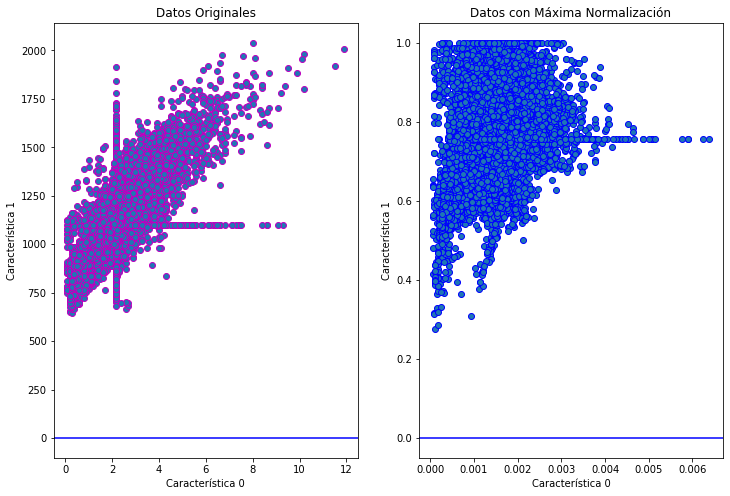

In [ ]:
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada
from matplotlib import pyplot # Librería para hacer gráficas

NM = Normalizer(norm ='max') # Método de maxima normalización
Datos_NM = NM.fit_transform(Datos_Media)
print(Datos_NM)  # Resultado de la máxima normalización

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(Datos_Media[:,0], Datos_Media[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(Datos_NM[:,0], Datos_NM[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Máxima Normalización') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

**3) Normalización L1 y L2:** Es una transformación de datos que relaciona los datos $x_{n,d}$ con rescpeto a una norma L1 o una norma L2 o Euclidiana:

$$L1(x_{n,d}) = \frac{x_{n,d}}{\vert \vert x \vert \vert_{1}} =\frac{x_{n,d}}{\sum_{n=1}^N \vert x_{n,d}\vert}$$

$$L2(x_{n,d}) = \frac{x_{n,d}}{\vert \vert x \vert \vert_{2}}= \frac{x_{n,d}}{\sqrt{\sum_{n=1}^N \vert x_{n,d}\vert^2}}$$

En la norma L2, los datos son divididos o medidos por la longitud del vector en el espacio de coordenadas, lo cual no cambia la forma de la distribución natural de los datos originales debido a que esta normalización siempre se divide por una constante L2, $\vert \vert x \vert \vert_{2}$.

Veamos un ejemplo aplicativo de esta transformación:

[[3.75290608e-04 1.96305856e-01 2.16513812e-02 ... 1.96305855e-03
  7.05474185e-03 1.09376113e-04]
 [3.15862322e-04 2.04086543e-01 1.76882900e-02 ... 2.10048444e-03
  7.53331636e-03 1.14577075e-04]
 [3.37393659e-04 2.15011777e-01 1.34957463e-02 ... 1.82499299e-03
  8.27764675e-03 1.15057229e-04]
 ...
 [4.07631057e-04 1.93964445e-01 3.71643716e-02 ... 4.56886470e-03
  3.11667907e-03 1.08811807e-04]
 [4.08695652e-04 1.95103520e-01 4.25844943e-02 ... 5.51252585e-03
  2.63706003e-03 1.00007031e-04]
 [4.05569451e-04 1.97392495e-01 4.03379037e-02 ... 5.25396797e-03
  2.41959047e-03 9.26917376e-05]]


[[8.86938109e-04 4.63936857e-01 5.11695063e-02 ... 4.63936854e-03
  1.66727311e-02 2.58492594e-04]
 [7.36795434e-04 4.76061950e-01 4.12605443e-02 ... 4.89968962e-03
  1.75725710e-02 2.67267920e-04]
 [7.89836266e-04 5.03341111e-01 3.15934506e-02 ... 4.27229620e-03
  1.93779149e-02 2.69348193e-04]
 ...
 [1.00574596e-03 4.78567453e-01 9.16954585e-02 ... 1.12727358e-02
  7.68976585e-03 2.68470798e-0

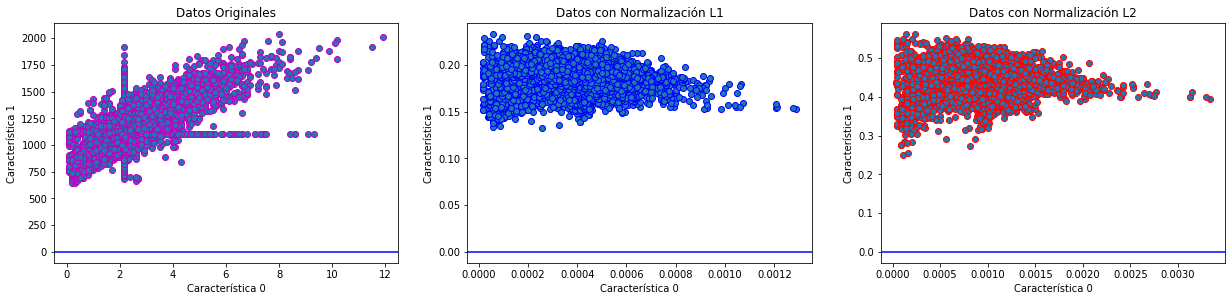

In [ ]:
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada
from matplotlib import pyplot # Librería para hacer gráficas

L1 = Normalizer(norm ='l1') # Método de normalización L1
L2 = Normalizer(norm ='l2') # Método de normalización L2

Datos_L1= L1.fit_transform(Datos_Media)
Datos_L2= L2.fit_transform(Datos_Media)
print(Datos_L1)  # Resultado de la normalización L1
print('\n')
print(Datos_L2)  # Resultado de la normalización L2

fig = pyplot.figure(figsize=(21,15)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(3, 3, 1)   
ax.scatter(Datos_Media[:,0], Datos_Media[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(3, 3, 2) 
ax.scatter(Datos_L1[:,0], Datos_L1[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Normalización L1') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(3, 3, 3) 
ax.scatter(Datos_L2[:,0], Datos_L2[:,1], edgecolors="r")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Normalización L2') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

pyplot.show()

**Recomendaciones para el escalamiento y normalización de datos:**

1.   Cuando hay datos muy esparcidos (observándolos en el espacio de características), la normalización min-max y el escalamiento estándar pueden substraer una cantidad de datos desde los datos originales. Para este caso, la normalización min-max genera un desplazamiento sobre los valores mínimos de todas las características de los datos originales. Para el caso del escalamiento estándar, el desplazamiento se genera sobre los valores promedio de todas las características de los datos originales. Lo anterior puede ocasionar una alteración de los datos con valores mínimos o promedio si los datos tienen demasiado esparcidos en el espacio de características.

2.   Considerando el mismo caso de los datos esparcidos, si el desplazamiento no es cero, entonces ambas transformaciones pueden convertir un vector de características dispersa donde la mayoría de los valores son cero cuando los datos están demasiado esparcidos. Lo anterior puede ocasionar un incremento el costo de máquina (consumo de memoría RAM) cuando se construye modelos con algoritmos de machine learning.

# Reducción de dimensionalidad

La reducción de dimensionalidad es un conjunto de algoritmos que proyecta datos de alta dimensionalidad a datos de baja dimensionalidad, conservando hasta lo posible la fidelidad de información de los datos originales y eliminando información redudante de los datos. Una de las grandes ventajas de la reducción de dimensionalidad es ayudar a crear un modelo que sea capaz de identificar patrones más eficientemente que en vez de utilizar los datos originales. 

Veamos algunos algoritmos básicos para reducción de dimensionalidad

**a) Análisis de Componentes Principales (PCA):** Definición de PCA:

Es un método que expresa un punto (que representa un dato de una base de datos) usando una base ortogonal que representa N vectores linealmente independientes. Lo anterior permite comparar un primer componente principal con respecto a una segunda componente principal y deducir por una correlación entre ellas, cual componente aporta mayor información. Para llegar a ese punto, PCA calcula una matriz de covarianza que correlaciona la primera y la segunda componente principal. 

Por ejemplo, si tenemos una matriz de covarianza entre las dos componentes princiaples:

$$C = \begin{bmatrix} 8.31 & -0.02 \\ -0.02 & 0.06\end{bmatrix}$$

Si se analiza la matriz, la variación horizontal (filas) es un poco más alta que la variación vertical (columnas). Eso significa que 8.31 es la primera componente que tiene mayor correlación con respecto a los demás componentes, lo cual se puede considerar el conjunto de características de esa primera componente para reducir la dimensionalidad.
 

In [ ]:
import pandas as pd

data_epiletic = pd.read_csv('local/data/Epiletic.csv', header = None, index_col= False, names = None)
data_epiletic = data_epiletic.loc[:,1:179] # Se filtra la primera columna porque no es información relevante para la reducción de dimensionalidad
display(data_epiletic)
print("Número de características: ", data_epiletic.shape[1])
data_epiletic_val = data_epiletic.values

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


Número de características:  179


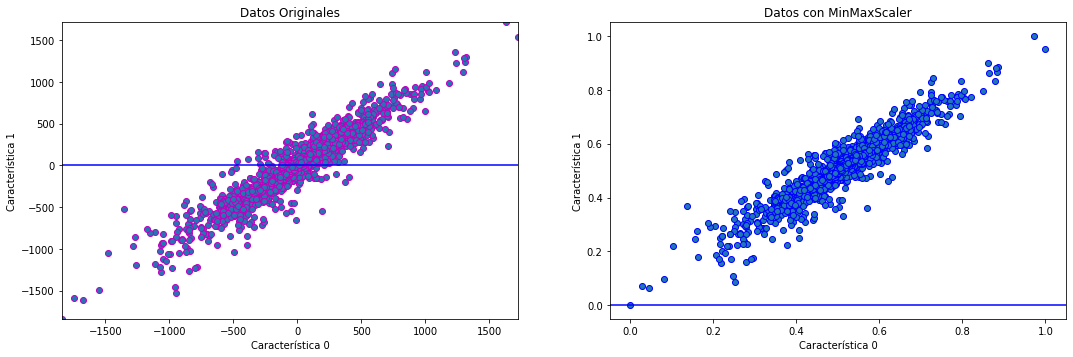

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import numpy as np

MMS = MinMaxScaler(copy=True, feature_range=(0, 1))

Datos_MMS = MMS.fit_transform(data_epiletic_val)

fig = pyplot.figure(figsize=(18,12)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(2, 2, 1)   
ax.scatter(data_epiletic_val[:,0], data_epiletic_val[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(data_epiletic_val[:,0]),np.max(data_epiletic_val[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(data_epiletic_val[:,1]),np.max(data_epiletic_val[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(Datos_MMS[:,0], Datos_MMS[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con MinMaxScaler') # Titulo de la gráfica
pyplot.xlabel('Característica 0') # Etiqueta del eje x
pyplot.ylabel('Característica 1') # Etiqueta del eje y
pyplot.show()

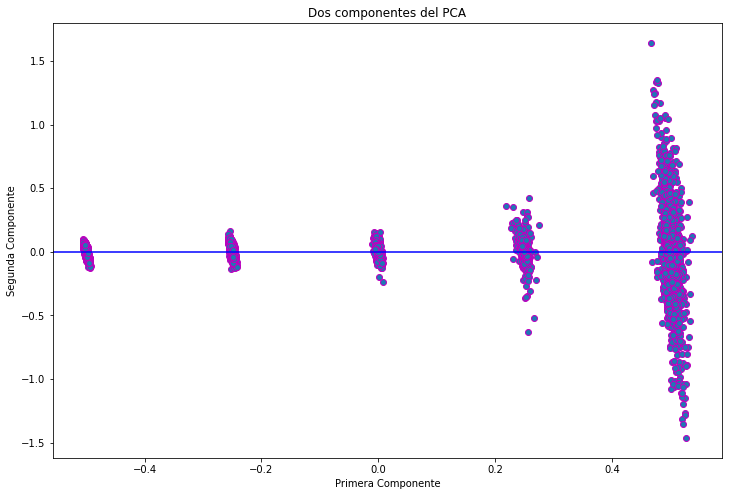

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(iterated_power='auto', n_components = 179, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

# El número de componentes debe ser menor o igual al número de características de los datos.

# Calcular los valores de las componentes principales iterated_power es el número de iteraciones para el método computacional de PCA. Usualmente, es aleatorio el número de
# iteraciones.
# n_components es el número de componentes principales
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio
# es la semilla usado por el generador de números aleatorios. Sugiero usar la primera opción.
# svd_solver es el método de solución de PCA. Por defecto, se usa svd_solver = "auto" pero pueden seleccionar "full",
# "arpack" o "randomized". Para más opciones de PCA, recomiendo visitar la siguiente url: 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Variables_Principales = pca.fit_transform(Datos_MMS) 
# Transformarmos las componentes principales a partir de los datos
Variables_Principales

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y
pyplot.show() # Mostrar figura

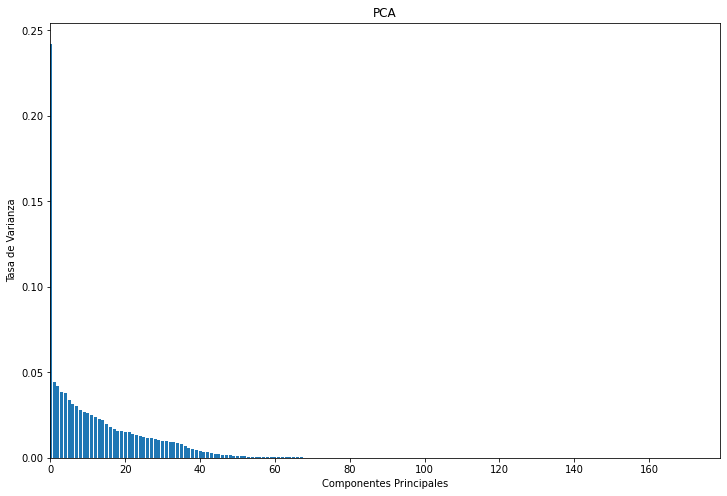

<Figure size 432x288 with 0 Axes>

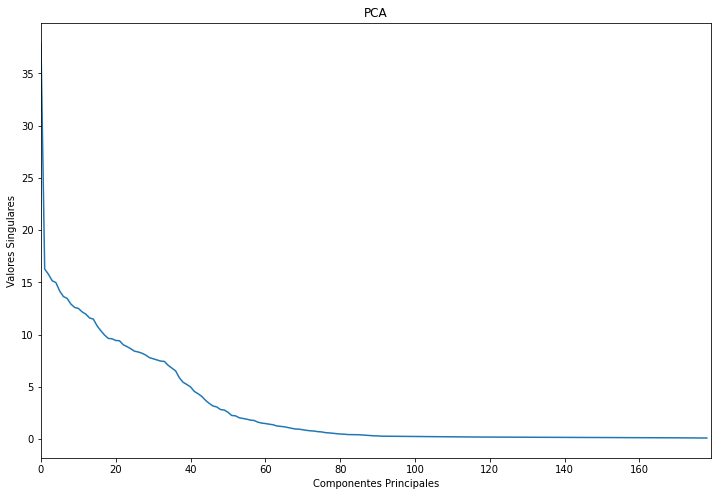

In [ ]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales
Valores_Singulares = pca.singular_values_

fig = pyplot.figure(figsize=(12,8))
pyplot.bar(np.arange(len(Varianza)), Varianza)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Tasa de Varianza')
pyplot.title('PCA')
pyplot.xlim(0, len(Varianza))
pyplot.show()

pyplot.figure()
fig = pyplot.figure(figsize=(12,8))
pyplot.plot(np.arange(len(Valores_Singulares)), Valores_Singulares)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Valores Singulares')
pyplot.title('PCA')
pyplot.xlim(0, len(Valores_Singulares))
pyplot.show()

In [ ]:
Importancia_Componentes = pd.DataFrame(data = Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes.loc[:,0:49].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 10 componentes:  [55.59871994]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [76.21632164]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [88.78848871]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [96.50489975]
Porcentaje de Varianza detectada para las primeras 50 componentes:  [98.90297719]


In [ ]:
Componentes_Seleccionadas = 50
Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

Datos_Reducidos_1 = Nuevas_Componentes.fit_transform(Datos_MMS) 

print('Tamaño de los datos originales con MinMax: ', Datos_MMS.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_Reducidos_1.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (11500, 179)
Tamaño de los datos reducidos:  (11500, 51)
Porcentaje de la varianza explicada con las componentes seleccionadas: 98.90%


**b) Kernel PCA (Kernel PCA):** Es un algoritmo que realiza una transformación no lineal de los datos, por medio de una función de similaridad de los puntos de los datos originales con el fin de generar una reducción no lineal de los datos. Tales funciones están basados en el *método o truco kernel* que mapea el espacio de característica de forma implicita tal que la mayoría de los datos representa un número de dimensiones mucho más pequeño que la dimensión original de los datos. De acuerdo a la función de similaridad que se seleccione, se debe configurar los parámetros apropiados para tal función (función de base radial, función polinomial, función lineal, etc,,,).

Veamos un ejemplo de aplicación de este algoritmo de reducción de dimensionalidad.

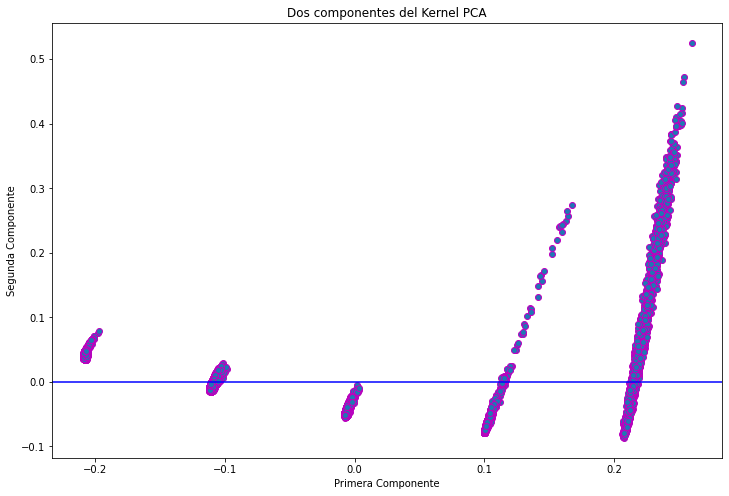

In [ ]:
from sklearn.decomposition import KernelPCA # Cargamos el método Kernel PCA
from matplotlib import pyplot

kpca = KernelPCA(n_components = 20, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.1)
# n_components es el número de componentes principales
# kernel es el método de separación no lineal de los datos. Se puede utilizar diferentes opciones tales como:“linear”, 
# “poly”, “rbf”, “sigmoid”, “cosine”, “precomputed”
# fit_inverse_transform es una transformada inversa de funciones kernel no precomputados, es decir, aprender a encontrar
# por ejemplo la pre-imagen de un punto de los datos. Se recomienda usar fit_inverse_transform = "True" o "False". Si
# se usa kernel = 'rbf', entonces fit_inverse_transform = True
# gamma es un parámetro  que determina los coefientes del Kernel. Solo se usa si kernel= 'rbf', 'poly' o 'sigmoid'.
# Para otros Kernels, no es necesario definir este parámetro.

Variables_Principales_Kernel = kpca.fit_transform(Datos_MMS)
Variables_Principales_Kernel

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_Kernel[:,0], Variables_Principales_Kernel[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del Kernel PCA') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y
pyplot.show() # Mostrar figura

Valores propios del método kernel:  [262.7725166   64.0289144   33.45964038  30.29626567  28.54539004
  27.40558927  26.89387633  23.34814342  22.31523649  21.39895144
  20.92202355  20.16310704  19.48277303  18.73934501  16.99240312
  16.74214049  16.16693738  13.06809238  12.0460367   11.40343988]


(0.0, 20.0)

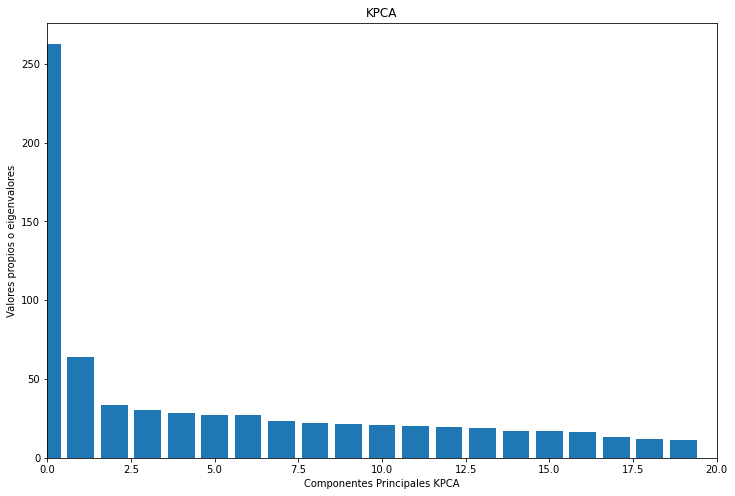

In [ ]:
lambdas_kpca = kpca.lambdas_ # Calculamos los eigenvalores o valores propios de la matriz kernel centrado en orden decreciente.
print("Valores propios del método kernel: ", lambdas_kpca)

fig = pyplot.figure(figsize=(12,8))
pyplot.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
pyplot.xlabel('Componentes Principales KPCA')
pyplot.ylabel('Valores propios o eigenvalores')
pyplot.title('KPCA')
pyplot.xlim(0, len(lambdas_kpca))

In [ ]:
NUM_Componentes = 2
kpca_main = KernelPCA(n_components = NUM_Componentes, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.1)
Datos_Kernel_RED = kpca_main.fit_transform(Datos_MMS)
print('Tamaño de los datos originales con MinMax: ', Datos_MMS.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Kernel PCA: ', Datos_Kernel_RED.shape) # Tamaño de los datos reducidos con Kernel PCA

Tamaño de los datos originales con MinMax:  (11500, 179)
Tamaño de los datos reducidos con Kernel PCA:  (11500, 2)


In [ ]:
Datos_inversa = kpca_main.inverse_transform(Datos_Kernel_RED)
print('Tamaño de los datos con transformada inversa: ', Datos_inversa.shape)

Tamaño de los datos con transformada inversa:  (11500, 179)


In [ ]:
def error_kernelpca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

Error promedio: 0.04


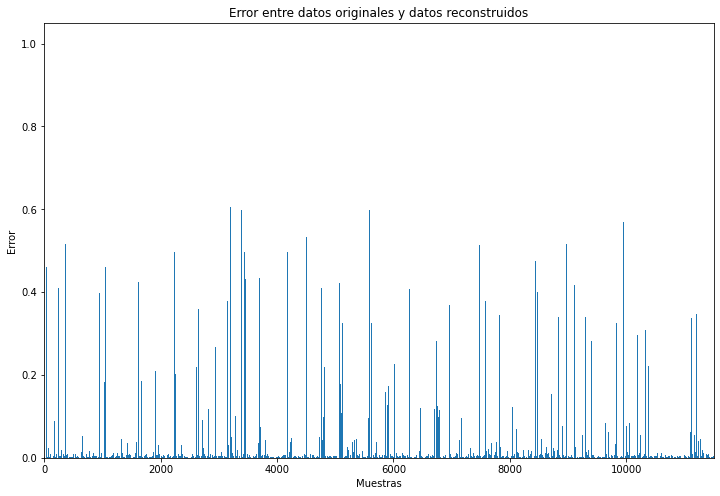

In [ ]:
Datos_MMS_DF = pd.DataFrame(data = np.array(Datos_MMS))
Datos_inversa_DF = pd.DataFrame(data = np.array(Datos_inversa))
Error = error_kernelpca(Datos_MMS_DF, Datos_inversa_DF)
print('Error promedio: {:.2f}'.format(np.mean(Error)))
fig = pyplot.figure(figsize=(12,8))
pyplot.bar(np.arange(len(Error)), Error)
pyplot.xlabel('Muestras')
pyplot.ylabel('Error')
pyplot.title('Error entre datos originales y datos reconstruidos')
pyplot.xlim(0, len(Error))
pyplot.show()

**c) PCA Incremental:** Es un algoritmo mejorado del PCA para reducción de dimensionalidad cuando la base de datos es muy grande. Por lo general, el PCA incremental establece pequeños lotes o batches de datos, permitiendo ejecutar el algoritmo PCA por cada lote y así, se evita un cosumo excesivo de memoría RAM. El tamaño del batch se establece en bits, donde el valor típico es 32.

A continuación, vemoas un ejemplo práctico del PCA incremental.

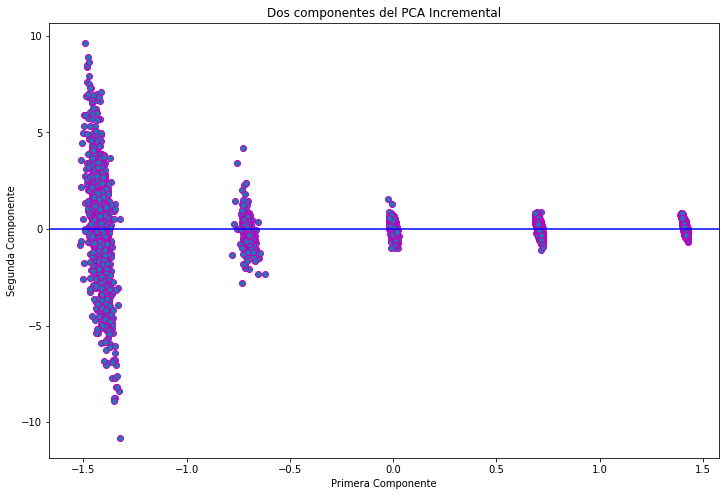

In [ ]:
from sklearn.decomposition import IncrementalPCA # Cargamos el método PCA incremental
from matplotlib import pyplot

incPCA = IncrementalPCA(n_components = 179, whiten = True, batch_size = 179)

Variables_Principales_IPCA = incPCA.fit_transform(Datos_MMS) 
# Transformarmos las componentes principales a partir de los datos
Variables_Principales_IPCA

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_IPCA[:,0], Variables_Principales_IPCA[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA Incremental') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y
pyplot.show() # Mostrar figura

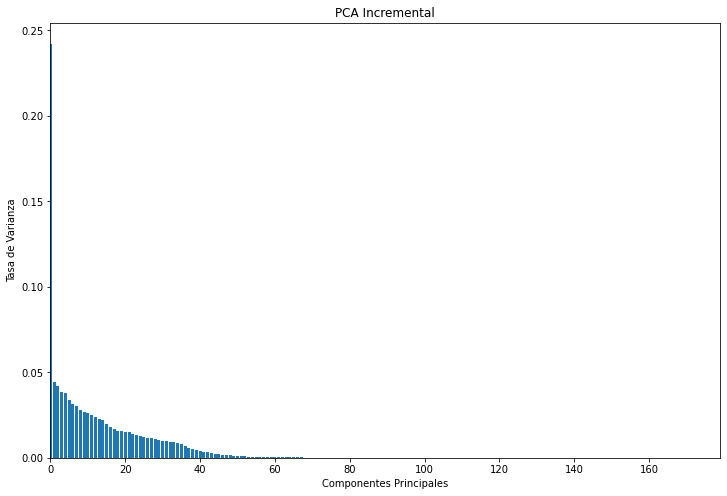

<Figure size 432x288 with 0 Axes>

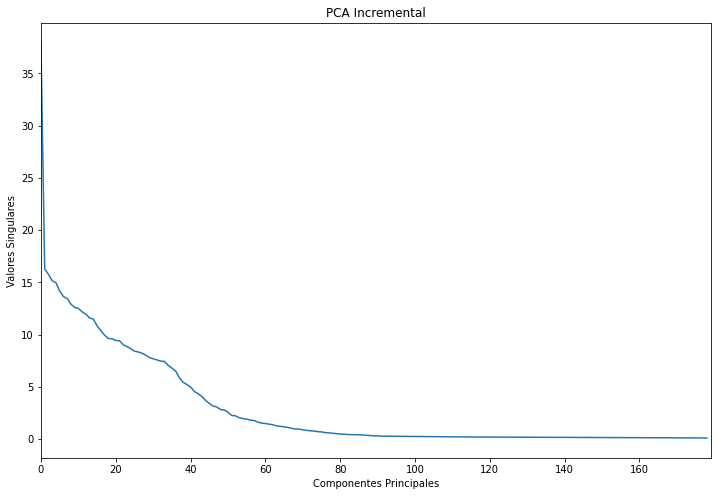

In [ ]:
Varianza_incPCA = incPCA.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales
Valores_Singulares_incPCA = incPCA.singular_values_

fig = pyplot.figure(figsize=(12,8))
pyplot.bar(np.arange(len(Varianza_incPCA)), Varianza_incPCA)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Tasa de Varianza')
pyplot.title('PCA Incremental')
pyplot.xlim(0, len(Varianza_incPCA))

pyplot.figure()
fig = pyplot.figure(figsize=(12,8))
pyplot.plot(np.arange(len(Valores_Singulares_incPCA)), Valores_Singulares_incPCA)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Valores Singulares')
pyplot.title('PCA Incremental')
pyplot.xlim(0, len(Valores_Singulares_incPCA))
pyplot.show()

In [ ]:
Importancia_Componentes_incPCA = pd.DataFrame(data = Varianza_incPCA)
Importancia_Componentes_incPCA = Importancia_Componentes_incPCA.T
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:39].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 10 componentes:  [55.59871994]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [76.21632164]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [88.78848871]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [96.50489975]


In [ ]:
Componentes_Seleccionadas = 40
Tasa_Varianza_Explicada_incPCA = np.sum(Varianza_incPCA[0:Componentes_Seleccionadas])
Nuevas_Componentes_incPCA = PCA(Tasa_Varianza_Explicada_incPCA, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

Datos_Reducidos_incPCA = Nuevas_Componentes_incPCA.fit_transform(Datos_MMS) 

print('Tamaño de los datos originales con MinMax: ', Datos_MMS.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_Reducidos_incPCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada_incPCA*100))

Tamaño de los datos originales con MinMax:  (11500, 179)
Tamaño de los datos reducidos:  (11500, 41)
Porcentaje de la varianza explicada con las componentes seleccionadas: 96.50%


**d) PCA Esparcido:** Es una versión mejorada del algoritmo PCA que retiene algunos grados de esparcimiento, es decir, aquellos datos que genera una mayor dispersión con respecto a los demás datos. Por lo general, el PCA esparcido se controla por medio de un hiperparámetro llamado *alpha*, que permite generar transformaciones lineales de los datos basado en la cantidad de esparcimiento de los datos que se desea controlar. A diferencial del PCA clásico, el PCA esparcido realiza una reducción de dimensionliada más fino, lo cual, el consumo de memoría RAM es mayor con respecto al PCA clásico.

Vaamos un ejemplo práctico del PCA Esparcido.

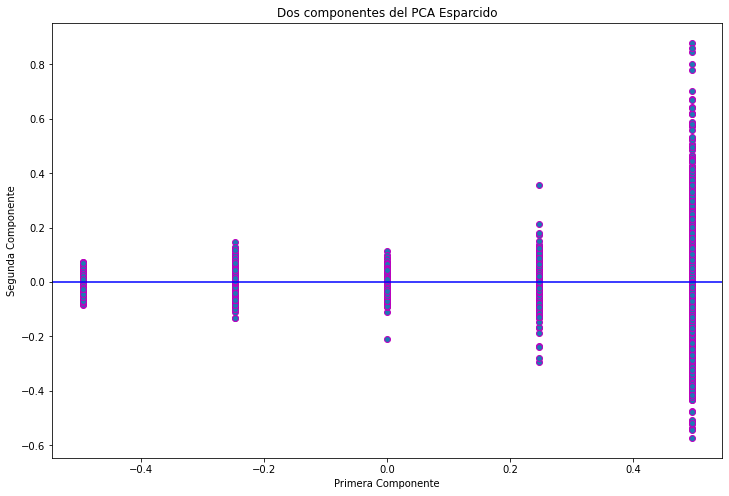

In [ ]:
from sklearn.decomposition import SparsePCA # Cargamos el método PCA esparcido
from matplotlib import pyplot

spca = SparsePCA(n_components = 179 , alpha = 0.1, ridge_alpha = 0.01, random_state = 17, max_iter = 1000, tol = 1e-3)
# n_components es el número de componentes principales
# alpha es un parámetro que controla que tan esparcido quiere la separación de los datos. Entre más grandes sea este parámetro,
# genera más componentes de como se separa los datos.  Se recomienda alpha = 0.1
# ridge_alpha es un parámetro de control fino del PCA esparcido.
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio

Variables_Principales_SPCA = spca.fit_transform(Datos_MMS)

fig = pyplot.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

pyplot.scatter(Variables_Principales_SPCA[:,0], Variables_Principales_SPCA[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Dos componentes del PCA Esparcido') # Titulo de la gráfica
pyplot.xlabel('Primera Componente') # Etiqueta del eje x
pyplot.ylabel('Segunda Componente') # Etiqueta del eje y
pyplot.show() # Mostrar figura

In [ ]:
import numpy as np
promedio_1 = np.mean(spca.components_ == 0)
print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio_1))

spca_2 = SparsePCA(n_components = 50 , alpha = 0.5, ridge_alpha = 0.05, random_state = 17, max_iter = 1000, tol = 1e-3)
Datos_SPCA_2 = spca_2.fit_transform(Datos_MMS)
promedio_2 = np.mean(spca_2.components_ == 0)
print('Valor promedio de esparcimiento con un número de componentes definida por usuario = {:.3f}'.format(promedio_2))

Valor promedio de esparcimiento con todas las componentes = 0.985
Valor promedio de esparcimiento con un número de componentes definida por usuario = 0.961


In [ ]:
print('Tamaño de los datos originales con MinMax: ', Datos_MMS.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_SPCA_2.shape)  # Tamaño de los datos reducidos

Tamaño de los datos originales con MinMax:  (11500, 179)
Tamaño de los datos reducidos:  (11500, 50)


# Detección y Eliminación de datos atípicos u outliers

**Datos atípicos u outliers:**  Un *outlier* es un púnto por el cual esta alejado desde el valor predicho por un modelo. Este tipo de datos se generan por diversas razones tales como almacenamiento incorrecto de la base de datos o el ruido de los sensores que generan lecturas erroneas, etc. Por lo general, los datos atípicos pueden tener pocos efectos en el desempeño de un modelo si el error que genera es pequeño o poco representativo para una predicción o una estimación. Sin embargo, si hay un porcentaje alto de la base de datos que son atípicos, el error puede incrementar abruptamente y generar una disminución el desempeño de un modelo de predicción o de clasficación, etc...

*Recomendación:* No se aconseja determinar un dato atípico desde la media debido a que la media de los datos cambia drásticamente con la presencia de datos atípicos. Por esta razón, varias técnicas de identificación de outliers se determina a partir de la **mediana** estadística de los datos porque es un estadístico de orden que da el valor medio de una muestra. En este caso, cuando los datos están ordenados por su magnitud, la mediana se define como el valor que está en el medio de la lista de datos ordenados, haciendo más robusto para detectar presencia de outliers.

**Boxplot**: es un gráfico univariado que detecta los valores atípicos u outliers componente por componente y que puede comparar las distribuciones de los datos entre los diferentes grupos de datos.

**Construcción de boxplots:**

1. Dibujar una caja cuyas fronteras de la caja es el cuartil más bajo y el cuartil más grande de una característica de los datos. En este caso, el 50% de los datos de una característica están dentro de la caja.
2. Dibujar la mediana de los datos de una característica como una línea sólida y la media como una línea punteada.
3. Dibujar "bigotes" desde cada extremo del recuadro hasta el punto más alejado que NO sea un dato atípico u outlier.
4. Mostrar los valores atípicos como "?" o ""dependiendo de si están fuera de la caja respectivamente. Se recomienda etiquetar si es posible los datos atípicos.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas

LE = LabelEncoder()
nombres = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital,status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv('local/data/adult.data', header = None, index_col= False, names = nombres)
df = pd.DataFrame(data)
data['workclass'] = LE.fit_transform(data['workclass'])
data['education'] = LE.fit_transform(data['education'])
data['marital,status'] = LE.fit_transform(data['marital,status'])
data['occupation'] = LE.fit_transform(data['occupation'])
data['relationship'] = LE.fit_transform(data['relationship'])
data['race'] = LE.fit_transform(data['race'])
data['gender'] = LE.fit_transform(data['gender'])
data['native-country'] = LE.fit_transform(data['native-country'])
data['income'] = LE.fit_transform(data['income'])

display(df)

,age,workclass,fnlwgt,education,education-num,"marital,status",occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
grouped_data = df.groupby('gender') # Agrupar datos de acuerdo a una característica
grouped_data.describe() # Descripción de los grupos con otras características

age                                    ... income                    
          count       mean        std   min   25%  ...    min  25%  50%  75%  max
gender                                             ...                           
0       10771.0  36.858230  14.013697  17.0  25.0  ...    0.0  0.0  0.0  0.0  1.0
1       21790.0  39.433547  13.370630  17.0  29.0  ...    0.0  0.0  0.0  1.0  1.0

[2 rows x 112 columns]

In [ ]:
grouped_data.mean() # Media de los grupos con otras características

,age,workclass,fnlwgt,education,education-num,"marital,status",occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
gender,,,,,,,,,,,,,,
0,36.858230,3.670133,185746.311206,10.448798,10.035744,2.888868,6.089778,2.777458,3.560579,568.410547,61.187633,36.410361,36.809210,0.109461
1,39.433547,3.967141,191771.449013,10.223772,10.102891,2.474897,6.811473,0.788389,3.717898,1329.370078,100.213309,42.428086,36.674208,0.305737


In [ ]:
grouped_data.median() # Media de los grupos con otras características

,age,workclass,fnlwgt,education,education-num,"marital,status",occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
gender,,,,,,,,,,,,,,
0,35,4,176077,11,10,4,7,3,4,0,0,40,39,0
1,38,4,180140,11,10,2,6,0,4,0,0,40,39,0


In [ ]:
Male1 = df[df.gender == 1]
Female1 = df[df.gender == 0]
Male1_median = Male1['age'].median()
Female1_median = Female1['age'].median()
print('Edad mediana de hombres y mujeres es:', Male1_median, Female1_median)
Male2 = df[(df.gender == 1) & (df.income == 1)]
Female2 = df[(df.gender == 0) & (df.income == 1)]
Male2_median = Male2['age'].median()
Female2_median = Female2['age'].median()
print('Edad mediana de hombres y mujeres con salarios altos:', Male2_median, Female2_median)

Edad mediana de hombres y mujeres es: 38.0 35.0
Edad mediana de hombres y mujeres con salarios altos: 44.0 41.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


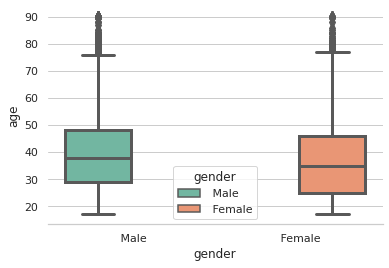

In [ ]:
import seaborn as sns # Librería de visualización para data science

nombres = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital,status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv('local/data/adult.data', header = None, index_col= False, names = nombres)
sns.set(style="whitegrid")
sns.boxplot(x = "gender", y="age", data = data, linewidth = 3, palette="Set2", hue="gender", fliersize = 8)
sns.despine(left=True)

**Gráfica del Violín:** Es un gráfico variante del boxplot que permite mostrar la distribución cuantitativa de los datos a través de varios niveles de variables categóticas tal que aquellas distribuciones pueden ser comparadas. Una diferencial con respecto al boxplot es que muestra una *estimación de densidad de los datos* bajo una cierta distribución de probabilidad. No obstante, la comparación entre distribuciones de datos puede estar afectada por el tamaño de las muestras, lo cual unos violines pueden ser más pequeños que otros.

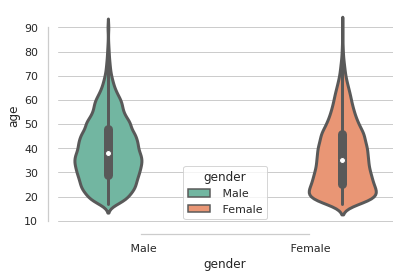

In [ ]:
import seaborn as sns # Librería de visualización para data science

sns.violinplot(x = "gender", y="age", data = data, linewidth = 3, palette="Set2", hue="gender", fliersize = 8)
sns.despine(offset=10, trim=True);

**Detección de outilers no supervisado:** Es un método de detección de outilers basado en una búsqueda local de datos atípicos llamado *factor atípico local o LOF*. Al usar LOF, se calcula la desviación local de la densidad de cada muestra con respecto a sus vecinos más cercanos. Por lo general, se utiliza una métrica de distancia entre una muestra y los vecinos más cercanos de forma local, donde una distancia más grande de un vecino con respecto a una muestra se considera como dato atípico. 

Veamos un ejemplo aplicativo de está técnica de detección de outilers:

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-1. -1. -1. ... -1. -1. -1.]
Número de datos atípicos:  26


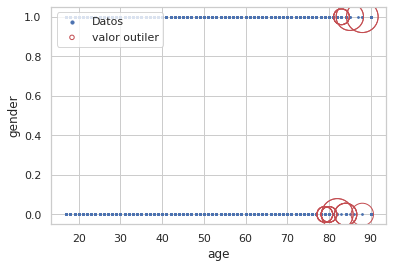

Número de muestras sin outilers: 32535


,age,gender
0,39,1
1,50,1
2,38,1
3,53,1
4,28,0
...,...,...
32556,27,0
32557,40,1
32558,58,0
32559,22,1


In [ ]:
from sklearn.neighbors import LocalOutlierFactor # detección de outlers no supervisado basado en LOF
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', metric = 'euclidean')
Filtrado = LOF.fit_predict(df.loc[:, ['age', 'gender']])
NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por 
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(data.loc[:, ['age', 'gender']]), dtype=int)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de datos atípicos: ", n_errors)
pyplot.scatter(df['age'], df['gender'], color='b', s=3, label='Datos')
pyplot.scatter(df['age'], df['gender'], s=1000 * radio_outiler, edgecolors='r', facecolors='none', label='valor outiler')
pyplot.axis('tight')
pyplot.xlabel('age')
pyplot.ylabel('gender')
legend = pyplot.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
pyplot.show()

pos = np.where(Filtrado == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers = df.loc[pos, ['age', 'gender']]
print("Número de muestras sin outilers:", datos_sin_outilers.shape[0])
display(datos_sin_outilers)

**Eliminación estándar de datos atípicos u outliers:** Por lo general, existen dos reglas básicas para la eliminación de datos atípicos:

1.   Calcular las muestras que están alejadas de la mediana. Estas muestras serán eliminadas posteriormente.
2.   Calcular las muestras cuyos valores sobrepasan la media por 2 o 3 veces la desviación estándar.

Veamos un ejemplo de eliminación de outliers:

Para la eliminación de datos atípicos, consideramos los siguientes requisitos: Se estabelce algunas muestras con edad media de 37 años y hasta los 72 años que tenga altos ingresos económicos y como edad mínima 22 años. De resto de muestras que no cumplan con estos criterios, seran datos atípicos que serán removidos.

In [ ]:
df2 = df.drop(df.index[(df.income == 1) & (df['age'] > df['age'].median() + 35) & (df['age'] > df['age'].median() - 15)])
ml1_age = Male2['age'] 
fm1_age = Female2['age']
ml2_age = ml1_age.drop(ml1_age.index[(ml1_age > df['age'].median() + 35) & (ml1_age > df['age'].median() - 15)])
fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > df['age'].median() + 35) & (fm1_age > df['age'].median() - 15)])
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()
print("Datos del genero Masculino:")
print("Media:", mu2ml , "Desviación estándar:", std2ml)
print("Mediana:", md2ml)
print("Mínimo:", ml2_age.min(), "Máximo:", ml2_age.max())
print("\n")
print("Datos del genero Femenino:")
print("Media:", mu2fm , "Desviación estándar:", std2fm)
print("Mediana:", md2fm)
print("Minimo:", fm2_age.min(), "Maximo:", fm2_age.max())

Datos del genero Masculino:
Media: 44.317982123920615 Desviación estándar: 10.019749857171412
Mediana: 44.0
Mínimo: 19 Máximo: 72


Datos del genero Femenino:
Media: 41.877028181041844 Desviación estándar: 10.036441807343714
Mediana: 41.0
Minimo: 19 Maximo: 72


In [ ]:
print("Número de muestras de los datos originales:", df.shape[0])
print("Número de muestras de los datos sin outliers:", df2.shape[0])
print("Número de muestras removidas:",  df.shape[0] - df2.shape[0])
print("Diferencia de la media entre edad de hombres y mujeres con los datos originales: ", (Male1['age'].mean() - Female1['age'].mean()))
print("Diferencia de la media entre edad de hombres y mujeres con los datos sin outliers: ", (mu2ml - mu2fm))

Número de muestras de los datos originales: 32561
Número de muestras de los datos sin outliers: 32492
Número de muestras removidas: 69
Diferencia de la media entre edad de hombres y mujeres con los datos originales:  2.5753170652810553
Diferencia de la media entre edad de hombres y mujeres con los datos sin outliers:  2.440953942878771


Efectivamente, la eliminación de outilers permitió reducir la diferencia de la media de edad entre hombres y mujeres que ganan más de de 50K. Para tener un panorama más amplio, se genera una gráfica las diferencias de edad entre hombres y mujeres por cada edad:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


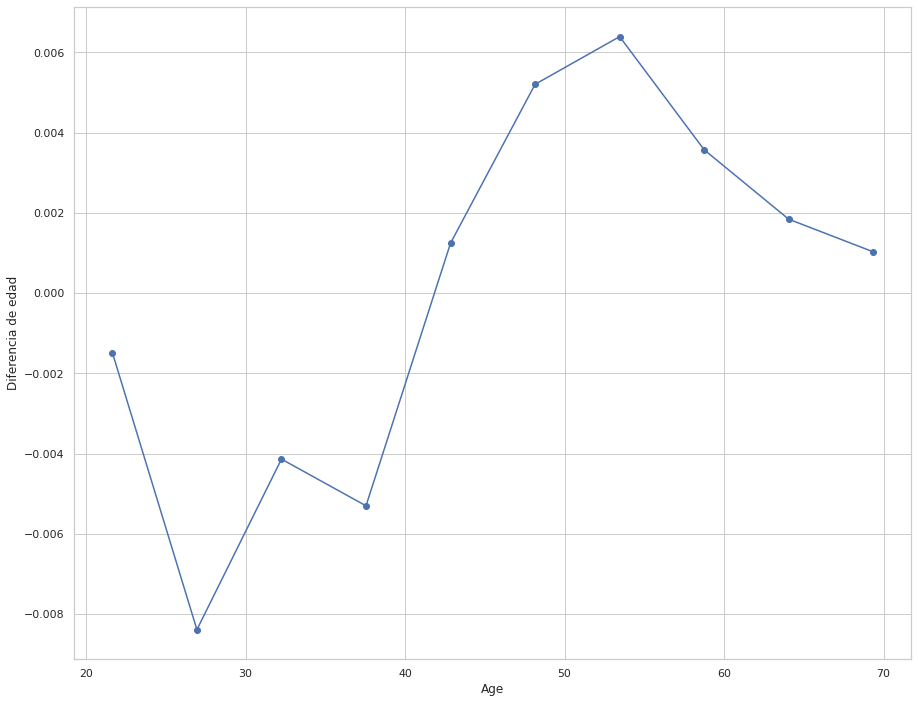

In [ ]:
from matplotlib import pyplot # Librería para hacer gráficas

countx , divisionx = np.histogram(ml2_age, normed = True) # Histograma de la edad de hombres que ganan más de 50K y tienen una edad entre 19 y 72 años
county , divisiony = np.histogram(fm2_age, normed = True) # Histograma de la edad de mujeres que ganan más de 50K y tienen una edad entre 19 y 72 años
val = [(divisionx[n] + divisionx[n+1])/2 for n in range(len(divisionx) - 1)]

pyplot.figure(figsize=(15,12))
pyplot.plot(val, countx - county , 'o-')
pyplot.xlabel('Age')
pyplot.ylabel('Diferencia de edad')
pyplot.show()

**Eliminación de outliers basado en el primer y tercer cuartil:** Es un método de eliminación de outliers basado en una función de distribución Gaussiana, donde se calcula el primer cuartil (Frontera más baja) y el tercer cuartil (la frontera más alta). Si un dato sobrepasa dichas fronteras, se considera un dato atípico. Se recomienda utilizar esta técnica con toda la base de datos.

In [ ]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt # para hacer las gráficas en python

q1, q3 = np.percentile(df,[25,75]) # Calculo de percentiles del primer y tercer cuartil de los datos llamado df
iqr = q3 - q1 # Diferencia entre percentiles
Frontera_baja = q1 - (1.5 * iqr) 
Frontera_alta = q3 + (1.5 * iqr)
print("La Frontera baja es {:.2f}".format(Frontera_baja))
print("La Frontera alta es {:.2f}".format(Frontera_alta))
print("Si el promedio de los datos en una muestra esta por fuera de los límites de ambas fronteras, entonces es un outlier")

La Frontera baja es -36.50
La Frontera alta es 63.50
Si el promedio de los datos en una muestra esta por fuera de los límites de ambas fronteras, entonces es un outlier


In [ ]:
def remove_outlier(datos):
    baja = .05 # Nivel de confianza del 5%, que indica la frontera baja.
    alta = .95 # Nivel de confianza del 95%, que indica la frontera alta.
    quant_datos = datos.quantile([baja, alta]) # Calculo del primer y tercer cuartil
    for name in list(datos.columns):
        if is_numeric_dtype(df[name]):
            datos = datos[(datos[name] > quant_datos.loc[baja, name]) & (datos[name] < quant_datos.loc[alta, name])]
    return datos

In [ ]:
Datos_sin_outliers = remove_outlier(pd.DataFrame(df))
display(Datos_sin_outliers) # Si no aparece datos, entonces todos los datos NO son atípicos y por consiguiente, se puede utilizar los datos originales.

,age,workclass,fnlwgt,education,education-num,"marital,status",occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


# Detección y Eliminación de Datos Atípicos en bases de datos de alta dimensionalidad

Cuando se requiere remover muestras que representan datos atípicos cuando la base de datos es de alta dimensionalidad, se requiere de algoritmos más eficientes para detectar outilers sin perder información útil de los datos. A continuación, analizaremos algunos de ellos:

**a) Detección de datos atípicos basado en algoritmos de reducción de dimensionalidad:** Por lo general, los métodos de reducción de dimensionalidad como PCA, Kernel PCA, ICA, etc..., se utilizan para obtener datos de baja dimensionalidad que permita crear un modelo de machine learning. No obstante, estos métodos también se utilizan para *detección de anomalias*, el cual permite identificar datos atípicos. Sin embargo, es importante considerar que los métodos de reducción de dimensionalidad no pueden capturar toda la información de las características originales de los datos ya que estos métodos se mueven hacia un espacio de baja dimensionalidad. Por esta razón, cuando se identifica datos atípicos con estos métodos, se requiere de una *función de puntaje anomalo* que permite verificar el error de reconstrucción de los datos originales. Lo anterior ayuda a verificar si la eliminación de datos atípicos reduce o no considerablemente la información de la base de datos. 

Veamos algunos casos de aplicación

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Escalamiento estándar

SS = StandardScaler()
data_acel = pd.read_csv('local/data/Watch_accelerometer.csv', header = None, index_col= False, names = None)
data_Y = data_acel.iloc[:,9:10] # Etiquetas de referencia
data_X = data_acel.iloc[:,0:9] # Datos sin etiquetas de referencia
data_acel_SSC = SS.fit_transform(data_X)
display(data_acel_SSC)

array([[-1.28791629, -0.96432374, -2.03103565, ..., -0.98094764,
        -2.55833189, -2.58813001],
       [-1.2879088 , -0.96432374, -2.03103561, ..., -0.98094764,
        -2.55833189, -2.58813001],
       [-1.28790131, -0.96432374, -2.03103551, ..., -0.98094764,
        -2.55833189, -2.58813001],
       ...,
       [-1.26892711, -1.03330339, -0.1205629 , ...,  2.40952161,
         0.3908797 ,  0.23108371],
       [-1.26891962, -1.03330328, -0.12056285, ...,  2.40952161,
         0.3908797 ,  0.23108371],
       [-1.26891213, -1.03330319, -0.12056279, ...,  2.40952161,
         0.3908797 ,  0.23108371]])

In [ ]:
def anomalidadPuntaje(datos_OR, datos_Reducidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reducidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

En la anterior función, la perdida es definida como:

$$L_{n} = \sum_{d=1}^D \vert \vert x_{n,d} - xr_{n,d}\vert \vert^2$$

donde $x_{n,d}$ es un dato de una muestra $n$ con respecto a una característica {d}; $xr_{n,d}$ es una muestra de los datos reconstruidos por un método de reducción de dimensionalidad de una muestra $n$ con respecto a una característica $d$.

Para facilitar la interpretación del puntaje de los datos si son o no atípicos, se recomienda normalizar los datos de las pérdidas, usando min-max 

In [ ]:
def scatterPlot(xDF, yDF, Reductor):
  xDF = xDF.loc[:,0:1]
  reduccion = pd.DataFrame(data = np.array(xDF), index = xDF.index, columns = ["Primer componente", "Segunda Componente"])
  etiquetas = pd.DataFrame(data = np.array(yDF), index = yDF.index, columns = ["Etiquetas"])
  concatenar = pd.concat((reduccion, etiquetas), axis = 1, join = "inner")
  sns.lmplot(x = "Primer componente", y = "Segunda Componente", hue = "Etiquetas", data = concatenar, fit_reg = False)
  ax = pyplot.gca()
  ax.set_title("Separación de muestras con "+Reductor)

In [ ]:
def data_no_outilers(datas, puntaje, umbral):
  pos = np.where(puntaje < umbral)
  pos = np.asarray(pos)
  pos = np.hstack(pos)
  datos_sin_outilers = datas.loc[pos, :]
  return datos_sin_outilers

Puntajes de outliers:  0          0.093317
1          0.091653
2          0.090503
3          0.089265
4          0.087207
             ...   
1048570    0.648929
1048571    0.648806
1048572    0.648664
1048573    0.649176
1048574    0.649123
Length: 1048575, dtype: float64


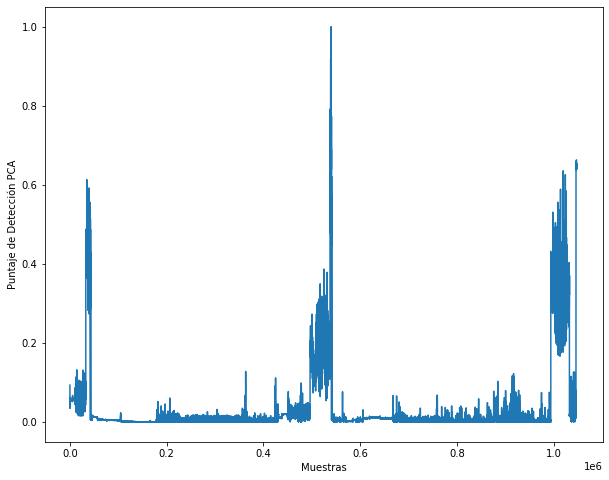

,0,1,2,3,4,5,6,7,8,9
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,1,1,1,1
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,1,1,1,1
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,1,1,1,1
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,1,1,1,1
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1046032,13562,1424695502419,1222923776000,5.358822,1.681927,8.149862,3,1,3,6
1046033,13563,1424695502419,1222931071000,6.189610,1.089362,8.617331,3,1,3,6
1046034,13565,1424695502419,1227599181000,5.955577,2.006341,7.944560,3,1,3,6
1046035,13566,1424695502420,1227608973000,6.471527,2.162563,7.293337,3,1,3,6


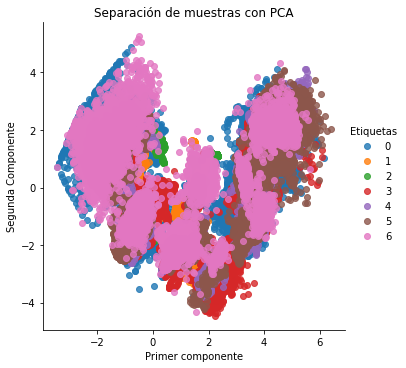

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import numpy as np

pca = PCA(n_components = 7, whiten = False, random_state = 17) # n_components debe ser menor o igual al número de características de los datos
data_pca = pca.fit_transform(data_acel_SSC)
data_acel_SSC_pd = pd.DataFrame(data = data_acel_SSC)
data_pca = pd.DataFrame(data = data_pca, index = data_acel_SSC_pd.index)
data_pca_inversa = pca.inverse_transform(data_pca)
data_pca_inversa = pd.DataFrame(data = data_pca_inversa, index = data_acel_SSC_pd.index)
puntaje_PCA = anomalidadPuntaje(data_acel_SSC_pd, data_pca_inversa)
print("Puntajes de outliers: ", puntaje_PCA)
pyplot.figure(figsize=(10,8))
pyplot.plot(np.arange(0,puntaje_PCA.shape[0],1), puntaje_PCA)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección PCA')
pyplot.show()
scatterPlot(data_pca, data_Y, "PCA")
datos_sin_outilers = data_no_outilers(data_acel, puntaje_PCA, 0.15)
display(datos_sin_outilers)

Puntajes de outliers:  0          0.020154
1          0.019817
2          0.019669
3          0.019584
4          0.019904
             ...   
1048570    0.219864
1048571    0.218918
1048572    0.218346
1048573    0.217540
1048574    0.217569
Length: 1048575, dtype: float64


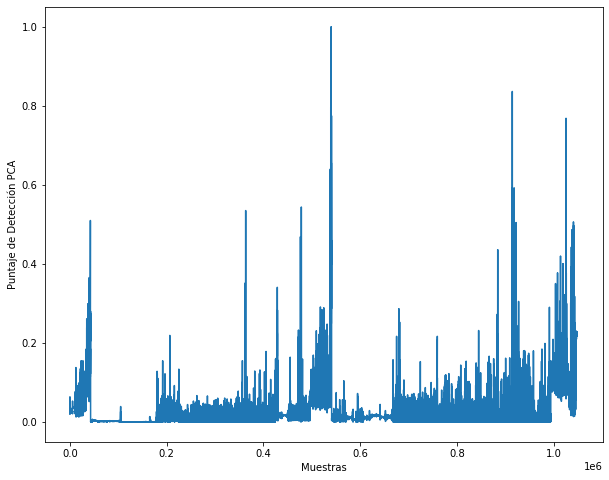

,0,1,2,3,4,5,6,7,8,9
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,1,1,1,1
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,1,1,1,1
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,1,1,1,1
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,1,1,1,1
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1046032,13562,1424695502419,1222923776000,5.358822,1.681927,8.149862,3,1,3,6
1046033,13563,1424695502419,1222931071000,6.189610,1.089362,8.617331,3,1,3,6
1046034,13565,1424695502419,1227599181000,5.955577,2.006341,7.944560,3,1,3,6
1046035,13566,1424695502420,1227608973000,6.471527,2.162563,7.293337,3,1,3,6


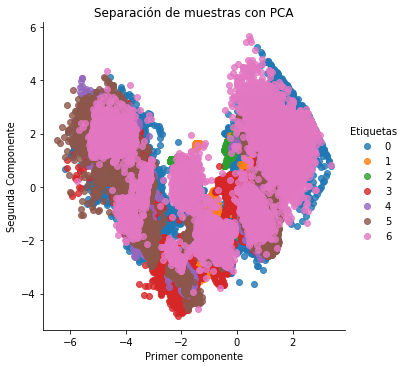

In [ ]:
from sklearn.decomposition import IncrementalPCA
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import numpy as np

ipca = IncrementalPCA(n_components = 6, whiten = False, batch_size = 32) # n_components debe ser menor o igual al número de características de los datos
data_ipca = ipca.fit_transform(data_acel_SSC)
data_acel_SSC_pd = pd.DataFrame(data = data_acel_SSC)
data_ipca = pd.DataFrame(data = data_ipca, index = data_acel_SSC_pd.index)
data_ipca_inversa = ipca.inverse_transform(data_ipca)
data_ipca_inversa = pd.DataFrame(data = data_ipca_inversa, index = data_acel_SSC_pd.index)
puntaje_IPCA = anomalidadPuntaje(data_acel_SSC_pd, data_ipca_inversa)
print("Puntajes de outliers: ", puntaje_IPCA)
pyplot.figure(figsize=(10,8))
pyplot.plot(np.arange(0,puntaje_IPCA.shape[0],1), puntaje_IPCA)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección PCA')
pyplot.show()
scatterPlot(data_ipca, data_Y, "IncrementalPCA")
datos_sin_outilers = data_no_outilers(data_acel, puntaje_IPCA, 0.15)
display(datos_sin_outilers)

**OPCIONAL: pueden usar el KernelPCA pero consume bastante memoría RAM para bases de datos de alta dimensionalidad**

In [ ]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
import numpy as np

kpca = KernelPCA(n_components = 8, kernel = 'rbf', gamma = 0.9, tol = 1e-3, max_iter = 1000) # n_components debe ser menor o igual al número de características de los datos
data_kpca = kpca.fit_transform(data_acel_SSC)
data_acel_SSC_pd = pd.DataFrame(data = data_acel_SSC)
data_kpca = pd.DataFrame(data = data_kpca, index = data_acel_SSC_pd.index)
data_kpca_inversa = kpca.inverse_transform(data_kpca)
data_kpca_inversa = pd.DataFrame(data = data_kpca_inversa, index = data_acel_SSC_pd.index)
puntaje_KPCA = anomalidadPuntaje(data_acel_SSC_pd, data_kpca_inversa)
print("Puntajes de outliers: ", puntaje_KPCA)
pyplot.figure(figsize=(10,8))
pyplot.plot(np.arange(0,puntaje_KPCA.shape[0],1), puntaje_KPCA)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección KCA')
pyplot.show()
scatterPlot(data_kpca, data_Y, "KernelPCA")
datos_sin_outilers = data_no_outilers(data_acel, puntaje_KPCA, 0.15)
display(datos_sin_outilers)

**b) Detección de datos atípicos basado en el algoritmo de aislamiento forestal:** Este algoritmo aisla las muestras por selectividad aleatoria de una característica de los datos, estableciendo un valor de referencia o umbral que divide entre los valores máximos y mínimos de una característica. Para realizar esta división, el algoritmo genera particiones de los datos que es representado mediante una estructura de un árbol de decisión (lo verán en la materia de aprendizaje automático 1 en la especialización), donde cada partición aisla una o más muestras que representen datos atípicos. 

Para que la detección de datos atípicos sea eficiente, el algoritmo genera un bosque de árboles aleatoriamente donde se calcula las longitudes de las ramificaciones de los árboles. Por regla general, este algoritmo establece que aquellas longitudes que sean más cortas para una o más muestras, se consideran como *datos atípicos*- 

Veamos un ejemplo de aplicación de este algoritmo.

In [ ]:
import pandas as pd

data_acel = pd.read_csv('local/data/Watch_accelerometer.csv', header = None, index_col= False, names = None)
display(data_acel)

,0,1,2,3,4,5,6,7,8,9
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,1,1,1,1
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,1,1,1,1
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,1,1,1,1
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,1,1,1,1
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1048570,2533,1424693589869,204773477802420,8.622971,-4.102448,1.686874,3,2,2,1
1048571,2534,1424693589874,204773482746267,8.634872,-4.095306,1.846359,3,2,2,1
1048572,2535,1424693589879,204773487690115,8.651535,-4.073883,1.967758,3,2,2,1
1048573,2536,1424693589884,204773492603445,8.642014,-3.995331,2.143906,3,2,2,1


Detección:  [-1 -1 -1 ... -1 -1 -1]
Puntaje de las muestras:  [-0.60108849 -0.60108849 -0.60027566 ... -0.61044963 -0.61003675
 -0.61199996]
Número de datos atípicos:  262143


,0,1,2,3,4,5,6,7,8,9
42578,0,1424696633911,207817520343346,-9.160782,-3.759674,1.396469,1,2,2,1
42579,1,1424696633916,207817525287194,-9.198868,-3.788239,1.420273,1,2,2,1
42580,2,1424696633921,207817530231042,-9.208389,-3.804901,1.439316,1,2,2,1
42581,3,1424696633926,207817535174889,-9.210770,-3.759674,1.446457,1,2,2,1
42582,4,1424696633931,207817540118737,-9.222671,-3.735870,1.377426,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
993962,453210,1424786886304,298069315541173,-7.054153,-4.052460,5.552597,2,2,2,6
993963,453211,1424786886309,298069320485021,-6.768509,-4.319061,5.538315,2,2,2,6
993964,453212,1424786886314,298069325428869,-6.842300,-3.962006,6.166733,2,2,2,6
993965,453213,1424786886319,298069330372716,-7.825394,-3.155060,5.571640,2,2,2,6


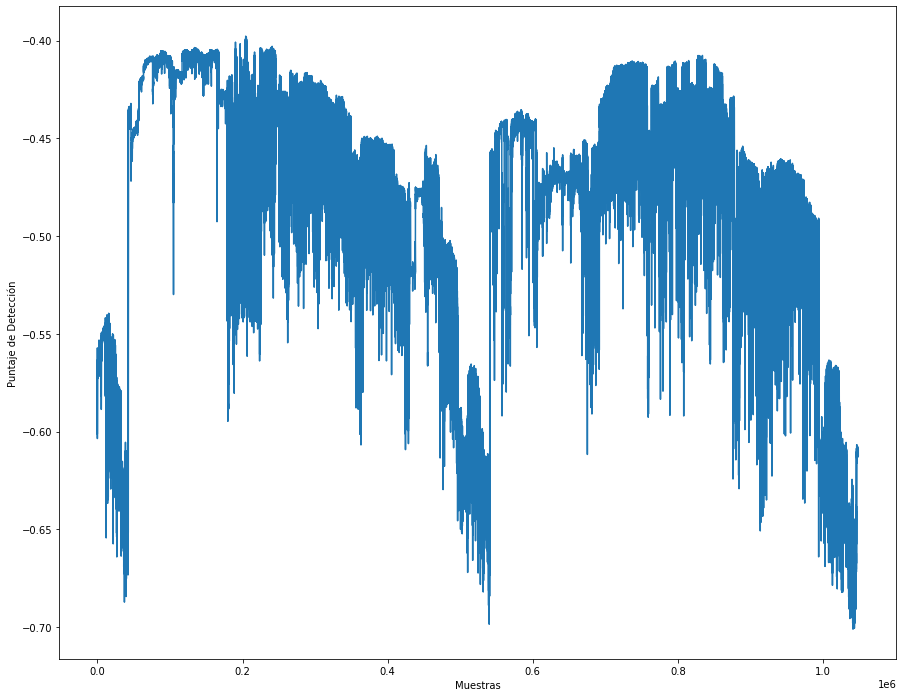

In [ ]:
from sklearn.ensemble import IsolationForest # algoritmo de aislamiento forestal
from matplotlib import pyplot # Librería para hacer gráficas
import numpy as np

ISF = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.25, random_state = 17)
DA = ISF.fit_predict(data_acel)
Puntaje = ISF.score_samples(data_acel) # Puntaje de los datos. Si el puntaje es más pequeño, entonces se considera un dato atípico
print("Detección: ", DA)
print("Puntaje de las muestras: ", Puntaje)

ground_truth = np.ones(len(data_acel), dtype = int)
n_error = (DA != ground_truth).sum() # número de datos atípicos

print("Número de datos atípicos: ", n_error)
pos = np.where(DA == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_acel = data_acel.loc[pos, :]
display(datos_sin_outilers_acel)

pyplot.figure(figsize=(15,12))
pyplot.plot(np.arange(0,Puntaje.shape[0],1), Puntaje)
pyplot.xlabel('Muestras')
pyplot.ylabel('Puntaje de Detección')
pyplot.show()